### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [1]:
import numpy as np

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [ ]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [ ]:
v * 4

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{2}) + (v_{1})(v_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [ ]:
v.dot(w)

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [ ]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [10]:
# gen 100 points with a bias of 25 and 25 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

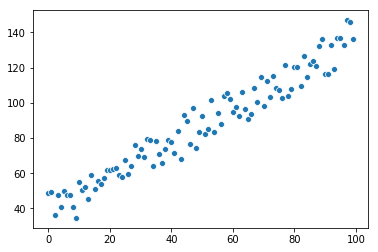

In [11]:
sns.scatterplot(x=x[:,1], y=y)

In [6]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 192.689424
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 192.647875
[1.90690254 1.53623967]
Iteration 2 | Cost: 192.624481
[1.90784336 1.53756152]
Iteration 3 | Cost: 192.609276
[1.90877753 1.53844468]
Iteration 4 | Cost: 192.597765
[1.90970725 1.53903323]
Iteration 5 | Cost: 192.587920
[1.91063396 1.53942393]
Iteration 6 | Cost: 192.578826
[1.91155864 1.53968176]
Iteration 7 | Cost: 192.570071
[1.91248195 1.53985035]
Iteration 8 | Cost: 192.561470
[1.91340434 1.53995901]
Iteration 9 | Cost: 192.552938
[1.91432609 1.54002743]
Iteration 10 | Cost: 192.544438
[1.91524742 1.54006882]
Iteration 11 | Cost: 192.535952
[1.91616845 1.54009206]
Iteration 12 | Cost: 192.527473
[1.91708927 1.54010311]
Iteration 13 | Cost: 192.518997
[1.91800994 1.54010597]
Iteration 14 | Cost: 192.510523
[1.91893051 1.54010334]
Iteration 15 | Cost: 192.502049
[1.919851   1.54009701]
Iteration 16 | Cost: 192.493577
[1.92077143 1.54008821]
Iteration 17 | Cost: 192.485105
[1.92169181 1.54007774]
It

[2.50322167 1.53131724]
Iteration 655 | Cost: 187.166749
[2.50412722 1.53130359]
Iteration 656 | Cost: 187.158547
[2.50503275 1.53128994]
Iteration 657 | Cost: 187.150346
[2.50593826 1.53127629]
Iteration 658 | Cost: 187.142145
[2.50684374 1.53126263]
Iteration 659 | Cost: 187.133945
[2.5077492  1.53124898]
Iteration 660 | Cost: 187.125745
[2.50865463 1.53123533]
Iteration 661 | Cost: 187.117546
[2.50956005 1.53122168]
Iteration 662 | Cost: 187.109347
[2.51046544 1.53120803]
Iteration 663 | Cost: 187.101148
[2.5113708  1.53119438]
Iteration 664 | Cost: 187.092950
[2.51227615 1.53118073]
Iteration 665 | Cost: 187.084752
[2.51318147 1.53116708]
Iteration 666 | Cost: 187.076555
[2.51408677 1.53115343]
Iteration 667 | Cost: 187.068358
[2.51499204 1.53113979]
Iteration 668 | Cost: 187.060161
[2.51589729 1.53112614]
Iteration 669 | Cost: 187.051965
[2.51680252 1.53111249]
Iteration 670 | Cost: 187.043769
[2.51770773 1.53109884]
Iteration 671 | Cost: 187.035574
[2.51861291 1.5310852 ]
Iterati

Iteration 1324 | Cost: 181.771850
[3.10482069 1.52224721]
Iteration 1325 | Cost: 181.763922
[3.10571097 1.52223379]
Iteration 1326 | Cost: 181.755995
[3.10660124 1.52222036]
Iteration 1327 | Cost: 181.748068
[3.10749148 1.52220694]
Iteration 1328 | Cost: 181.740141
[3.1083817  1.52219352]
Iteration 1329 | Cost: 181.732215
[3.1092719 1.5221801]
Iteration 1330 | Cost: 181.724289
[3.11016207 1.52216668]
Iteration 1331 | Cost: 181.716364
[3.11105223 1.52215326]
Iteration 1332 | Cost: 181.708439
[3.11194235 1.52213984]
Iteration 1333 | Cost: 181.700514
[3.11283246 1.52212642]
Iteration 1334 | Cost: 181.692590
[3.11372255 1.522113  ]
Iteration 1335 | Cost: 181.684666
[3.11461261 1.52209958]
Iteration 1336 | Cost: 181.676743
[3.11550265 1.52208616]
Iteration 1337 | Cost: 181.668820
[3.11639266 1.52207274]
Iteration 1338 | Cost: 181.660897
[3.11728266 1.52205933]
Iteration 1339 | Cost: 181.652975
[3.11817263 1.52204591]
Iteration 1340 | Cost: 181.645053
[3.11906258 1.52203249]
Iteration 1341 |

Iteration 2167 | Cost: 175.229455
[3.84737343 1.51105208]
Iteration 2168 | Cost: 175.221859
[3.84824488 1.51103894]
Iteration 2169 | Cost: 175.214263
[3.8491163  1.51102581]
Iteration 2170 | Cost: 175.206668
[3.84998771 1.51101267]
Iteration 2171 | Cost: 175.199073
[3.85085909 1.51099953]
Iteration 2172 | Cost: 175.191479
[3.85173045 1.51098639]
Iteration 2173 | Cost: 175.183885
[3.85260179 1.51097326]
Iteration 2174 | Cost: 175.176292
[3.8534731  1.51096012]
Iteration 2175 | Cost: 175.168699
[3.8543444  1.51094698]
Iteration 2176 | Cost: 175.161106
[3.85521567 1.51093385]
Iteration 2177 | Cost: 175.153513
[3.85608692 1.51092071]
Iteration 2178 | Cost: 175.145921
[3.85695814 1.51090758]
Iteration 2179 | Cost: 175.138330
[3.85782935 1.51089444]
Iteration 2180 | Cost: 175.130739
[3.85870053 1.51088131]
Iteration 2181 | Cost: 175.123148
[3.85957169 1.51086817]
Iteration 2182 | Cost: 175.115557
[3.86044283 1.51085504]
Iteration 2183 | Cost: 175.107967
[3.86131395 1.51084191]
Iteration 2184

Iteration 3075 | Cost: 168.488729
[4.62961349 1.49925861]
Iteration 3076 | Cost: 168.481475
[4.6304651  1.49924577]
Iteration 3077 | Cost: 168.474221
[4.63131668 1.49923293]
Iteration 3078 | Cost: 168.466968
[4.63216824 1.49922009]
Iteration 3079 | Cost: 168.459716
[4.63301977 1.49920725]
Iteration 3080 | Cost: 168.452463
[4.63387129 1.49919441]
Iteration 3081 | Cost: 168.445211
[4.63472278 1.49918158]
Iteration 3082 | Cost: 168.437960
[4.63557425 1.49916874]
Iteration 3083 | Cost: 168.430708
[4.6364257 1.4991559]
Iteration 3084 | Cost: 168.423458
[4.63727713 1.49914307]
Iteration 3085 | Cost: 168.416207
[4.63812854 1.49913023]
Iteration 3086 | Cost: 168.408957
[4.63897993 1.49911739]
Iteration 3087 | Cost: 168.401707
[4.63983129 1.49910456]
Iteration 3088 | Cost: 168.394458
[4.64068263 1.49909172]
Iteration 3089 | Cost: 168.387209
[4.64153396 1.49907889]
Iteration 3090 | Cost: 168.379960
[4.64238525 1.49906605]
Iteration 3091 | Cost: 168.372712
[4.64323653 1.49905322]
Iteration 3092 |

[5.33823284 1.48857508]
Iteration 3917 | Cost: 162.509504
[5.33906647 1.48856251]
Iteration 3918 | Cost: 162.502554
[5.33990007 1.48854994]
Iteration 3919 | Cost: 162.495604
[5.34073365 1.48853737]
Iteration 3920 | Cost: 162.488654
[5.34156721 1.48852481]
Iteration 3921 | Cost: 162.481705
[5.34240075 1.48851224]
Iteration 3922 | Cost: 162.474756
[5.34323427 1.48849967]
Iteration 3923 | Cost: 162.467807
[5.34406776 1.48848711]
Iteration 3924 | Cost: 162.460859
[5.34490124 1.48847454]
Iteration 3925 | Cost: 162.453911
[5.34573469 1.48846198]
Iteration 3926 | Cost: 162.446963
[5.34656812 1.48844941]
Iteration 3927 | Cost: 162.440016
[5.34740154 1.48843685]
Iteration 3928 | Cost: 162.433069
[5.34823493 1.48842428]
Iteration 3929 | Cost: 162.426123
[5.3490683  1.48841172]
Iteration 3930 | Cost: 162.419176
[5.34990165 1.48839915]
Iteration 3931 | Cost: 162.412231
[5.35073497 1.48838659]
Iteration 3932 | Cost: 162.405285
[5.35156828 1.48837402]
Iteration 3933 | Cost: 162.398340
[5.35240156 1.

Iteration 4767 | Cost: 156.727097
[6.04005159 1.47799408]
Iteration 4768 | Cost: 156.720440
[6.04086741 1.47798178]
Iteration 4769 | Cost: 156.713783
[6.04168321 1.47796948]
Iteration 4770 | Cost: 156.707127
[6.04249898 1.47795718]
Iteration 4771 | Cost: 156.700471
[6.04331474 1.47794488]
Iteration 4772 | Cost: 156.693815
[6.04413047 1.47793258]
Iteration 4773 | Cost: 156.687160
[6.04494619 1.47792028]
Iteration 4774 | Cost: 156.680505
[6.04576188 1.47790799]
Iteration 4775 | Cost: 156.673850
[6.04657755 1.47789569]
Iteration 4776 | Cost: 156.667196
[6.0473932  1.47788339]
Iteration 4777 | Cost: 156.660542
[6.04820884 1.47787109]
Iteration 4778 | Cost: 156.653888
[6.04902445 1.4778588 ]
Iteration 4779 | Cost: 156.647235
[6.04984004 1.4778465 ]
Iteration 4780 | Cost: 156.640582
[6.05065561 1.47783421]
Iteration 4781 | Cost: 156.633929
[6.05147115 1.47782191]
Iteration 4782 | Cost: 156.627277
[6.05228668 1.47780961]
Iteration 4783 | Cost: 156.620625
[6.05310219 1.47779732]
Iteration 4784

Iteration 5640 | Cost: 151.042225
[6.74443966 1.46737434]
Iteration 5641 | Cost: 151.035856
[6.74523761 1.46736231]
Iteration 5642 | Cost: 151.029488
[6.74603554 1.46735028]
Iteration 5643 | Cost: 151.023120
[6.74683344 1.46733825]
Iteration 5644 | Cost: 151.016752
[6.74763133 1.46732622]
Iteration 5645 | Cost: 151.010385
[6.74842919 1.46731419]
Iteration 5646 | Cost: 151.004018
[6.74922704 1.46730216]
Iteration 5647 | Cost: 150.997652
[6.75002486 1.46729014]
Iteration 5648 | Cost: 150.991285
[6.75082267 1.46727811]
Iteration 5649 | Cost: 150.984919
[6.75162045 1.46726608]
Iteration 5650 | Cost: 150.978554
[6.75241822 1.46725405]
Iteration 5651 | Cost: 150.972188
[6.75321596 1.46724203]
Iteration 5652 | Cost: 150.965823
[6.75401369 1.46723   ]
Iteration 5653 | Cost: 150.959459
[6.75481139 1.46721797]
Iteration 5654 | Cost: 150.953094
[6.75560907 1.46720595]
Iteration 5655 | Cost: 150.946730
[6.75640673 1.46719392]
Iteration 5656 | Cost: 150.940367
[6.75720438 1.46718189]
Iteration 5657

Iteration 6430 | Cost: 146.110452
[7.36854975 1.45796492]
Iteration 6431 | Cost: 146.104334
[7.36933187 1.45795313]
Iteration 6432 | Cost: 146.098216
[7.37011396 1.45794134]
Iteration 6433 | Cost: 146.092098
[7.37089603 1.45792955]
Iteration 6434 | Cost: 146.085981
[7.37167808 1.45791776]
Iteration 6435 | Cost: 146.079864
[7.37246012 1.45790596]
Iteration 6436 | Cost: 146.073747
[7.37324213 1.45789417]
Iteration 6437 | Cost: 146.067630
[7.37402412 1.45788238]
Iteration 6438 | Cost: 146.061514
[7.3748061 1.4578706]
Iteration 6439 | Cost: 146.055398
[7.37558805 1.45785881]
Iteration 6440 | Cost: 146.049283
[7.37636998 1.45784702]
Iteration 6441 | Cost: 146.043168
[7.3771519  1.45783523]
Iteration 6442 | Cost: 146.037053
[7.37793379 1.45782344]
Iteration 6443 | Cost: 146.030938
[7.37871566 1.45781165]
Iteration 6444 | Cost: 146.024824
[7.37949752 1.45779986]
Iteration 6445 | Cost: 146.018710
[7.38027935 1.45778808]
Iteration 6446 | Cost: 146.012596
[7.38106117 1.45777629]
Iteration 6447 |

Iteration 7340 | Cost: 140.669247
[8.07212736 1.4473574 ]
Iteration 7341 | Cost: 140.663405
[8.07289162 1.44734588]
Iteration 7342 | Cost: 140.657563
[8.07365586 1.44733436]
Iteration 7343 | Cost: 140.651721
[8.07442008 1.44732284]
Iteration 7344 | Cost: 140.645880
[8.07518429 1.44731131]
Iteration 7345 | Cost: 140.640039
[8.07594847 1.44729979]
Iteration 7346 | Cost: 140.634198
[8.07671264 1.44728827]
Iteration 7347 | Cost: 140.628358
[8.07747678 1.44727675]
Iteration 7348 | Cost: 140.622517
[8.07824091 1.44726523]
Iteration 7349 | Cost: 140.616678
[8.07900501 1.44725371]
Iteration 7350 | Cost: 140.610838
[8.0797691  1.44724219]
Iteration 7351 | Cost: 140.604999
[8.08053317 1.44723067]
Iteration 7352 | Cost: 140.599160
[8.08129722 1.44721915]
Iteration 7353 | Cost: 140.593321
[8.08206124 1.44720763]
Iteration 7354 | Cost: 140.587483
[8.08282525 1.44719611]
Iteration 7355 | Cost: 140.581645
[8.08358924 1.4471846 ]
Iteration 7356 | Cost: 140.575807
[8.08435321 1.44717308]
Iteration 7357

[8.69609798 1.43795008]
Iteration 8166 | Cost: 135.943194
[8.69684641 1.4379388 ]
Iteration 8167 | Cost: 135.937592
[8.69759482 1.43792752]
Iteration 8168 | Cost: 135.931990
[8.69834321 1.43791623]
Iteration 8169 | Cost: 135.926388
[8.69909159 1.43790495]
Iteration 8170 | Cost: 135.920786
[8.69983994 1.43789367]
Iteration 8171 | Cost: 135.915185
[8.70058828 1.43788238]
Iteration 8172 | Cost: 135.909584
[8.7013366 1.4378711]
Iteration 8173 | Cost: 135.903983
[8.70208489 1.43785982]
Iteration 8174 | Cost: 135.898383
[8.70283317 1.43784854]
Iteration 8175 | Cost: 135.892783
[8.70358143 1.43783726]
Iteration 8176 | Cost: 135.887183
[8.70432967 1.43782598]
Iteration 8177 | Cost: 135.881583
[8.70507789 1.4378147 ]
Iteration 8178 | Cost: 135.875984
[8.7058261  1.43780342]
Iteration 8179 | Cost: 135.870385
[8.70657428 1.43779214]
Iteration 8180 | Cost: 135.864786
[8.70732245 1.43778086]
Iteration 8181 | Cost: 135.859188
[8.70807059 1.43776958]
Iteration 8182 | Cost: 135.853590
[8.70881872 1.43

Iteration 9049 | Cost: 131.105340
[9.35035467 1.42808615]
Iteration 9050 | Cost: 131.099983
[9.35108651 1.42807512]
Iteration 9051 | Cost: 131.094626
[9.35181832 1.42806409]
Iteration 9052 | Cost: 131.089270
[9.35255011 1.42805306]
Iteration 9053 | Cost: 131.083913
[9.35328189 1.42804202]
Iteration 9054 | Cost: 131.078558
[9.35401365 1.42803099]
Iteration 9055 | Cost: 131.073202
[9.35474538 1.42801996]
Iteration 9056 | Cost: 131.067847
[9.3554771  1.42800893]
Iteration 9057 | Cost: 131.062492
[9.35620881 1.42799789]
Iteration 9058 | Cost: 131.057137
[9.35694049 1.42798686]
Iteration 9059 | Cost: 131.051783
[9.35767215 1.42797583]
Iteration 9060 | Cost: 131.046428
[9.3584038 1.4279648]
Iteration 9061 | Cost: 131.041074
[9.35913543 1.42795377]
Iteration 9062 | Cost: 131.035721
[9.35986703 1.42794274]
Iteration 9063 | Cost: 131.030367
[9.36059862 1.42793171]
Iteration 9064 | Cost: 131.025014
[9.3613302  1.42792068]
Iteration 9065 | Cost: 131.019661
[9.36206175 1.42790965]
Iteration 9066 |

Iteration 9915 | Cost: 126.566582
[9.97721689 1.41863524]
Iteration 9916 | Cost: 126.561456
[9.97793282 1.41862445]
Iteration 9917 | Cost: 126.556329
[9.97864873 1.41861365]
Iteration 9918 | Cost: 126.551203
[9.97936462 1.41860286]
Iteration 9919 | Cost: 126.546077
[9.98008049 1.41859207]
Iteration 9920 | Cost: 126.540952
[9.98079634 1.41858127]
Iteration 9921 | Cost: 126.535826
[9.98151218 1.41857048]
Iteration 9922 | Cost: 126.530701
[9.982228   1.41855969]
Iteration 9923 | Cost: 126.525577
[9.9829438 1.4185489]
Iteration 9924 | Cost: 126.520452
[9.98365958 1.41853811]
Iteration 9925 | Cost: 126.515328
[9.98437534 1.41852732]
Iteration 9926 | Cost: 126.510204
[9.98509109 1.41851652]
Iteration 9927 | Cost: 126.505080
[9.98580682 1.41850573]
Iteration 9928 | Cost: 126.499956
[9.98652253 1.41849494]
Iteration 9929 | Cost: 126.494833
[9.98723822 1.41848415]
Iteration 9930 | Cost: 126.489710
[9.98795389 1.41847336]
Iteration 9931 | Cost: 126.484588
[9.98866955 1.41846257]
Iteration 9932 |

Iteration 10889 | Cost: 121.694519
[10.66599334  1.40825087]
Iteration 10890 | Cost: 121.689640
[10.66669179  1.40824034]
Iteration 10891 | Cost: 121.684760
[10.66739023  1.40822981]
Iteration 10892 | Cost: 121.679881
[10.66808864  1.40821928]
Iteration 10893 | Cost: 121.675003
[10.66878704  1.40820875]
Iteration 10894 | Cost: 121.670124
[10.66948542  1.40819822]
Iteration 10895 | Cost: 121.665246
[10.67018379  1.4081877 ]
Iteration 10896 | Cost: 121.660368
[10.67088213  1.40817717]
Iteration 10897 | Cost: 121.655491
[10.67158046  1.40816664]
Iteration 10898 | Cost: 121.650613
[10.67227877  1.40815611]
Iteration 10899 | Cost: 121.645736
[10.67297707  1.40814558]
Iteration 10900 | Cost: 121.640859
[10.67367534  1.40813506]
Iteration 10901 | Cost: 121.635982
[10.6743736   1.40812453]
Iteration 10902 | Cost: 121.631106
[10.67507184  1.408114  ]
Iteration 10903 | Cost: 121.626230
[10.67577006  1.40810347]
Iteration 10904 | Cost: 121.621354
[10.67646826  1.40809295]
Iteration 10905 | Cost: 

Iteration 11682 | Cost: 117.901873
[11.21433822  1.39998373]
Iteration 11683 | Cost: 117.897187
[11.21502276  1.39997341]
Iteration 11684 | Cost: 117.892500
[11.21570729  1.39996309]
Iteration 11685 | Cost: 117.887813
[11.21639179  1.39995277]
Iteration 11686 | Cost: 117.883127
[11.21707628  1.39994245]
Iteration 11687 | Cost: 117.878441
[11.21776075  1.39993213]
Iteration 11688 | Cost: 117.873755
[11.2184452   1.39992181]
Iteration 11689 | Cost: 117.869070
[11.21912964  1.39991149]
Iteration 11690 | Cost: 117.864384
[11.21981406  1.39990117]
Iteration 11691 | Cost: 117.859699
[11.22049846  1.39989085]
Iteration 11692 | Cost: 117.855015
[11.22118284  1.39988054]
Iteration 11693 | Cost: 117.850330
[11.22186721  1.39987022]
Iteration 11694 | Cost: 117.845646
[11.22255156  1.3998599 ]
Iteration 11695 | Cost: 117.840962
[11.22323589  1.39984958]
Iteration 11696 | Cost: 117.836278
[11.2239202   1.39983927]
Iteration 11697 | Cost: 117.831594
[11.2246045   1.39982895]
Iteration 11698 | Cost: 

Iteration 12583 | Cost: 113.773902
[11.82412038  1.39079032]
Iteration 12584 | Cost: 113.769424
[11.82478945  1.39078024]
Iteration 12585 | Cost: 113.764947
[11.8254585   1.39077015]
Iteration 12586 | Cost: 113.760470
[11.82612754  1.39076006]
Iteration 12587 | Cost: 113.755993
[11.82679655  1.39074998]
Iteration 12588 | Cost: 113.751516
[11.82746556  1.39073989]
Iteration 12589 | Cost: 113.747040
[11.82813454  1.3907298 ]
Iteration 12590 | Cost: 113.742564
[11.82880351  1.39071972]
Iteration 12591 | Cost: 113.738088
[11.82947246  1.39070963]
Iteration 12592 | Cost: 113.733612
[11.83014139  1.39069955]
Iteration 12593 | Cost: 113.729137
[11.83081031  1.39068946]
Iteration 12594 | Cost: 113.724662
[11.83147921  1.39067938]
Iteration 12595 | Cost: 113.720187
[11.83214809  1.39066929]
Iteration 12596 | Cost: 113.715712
[11.83281696  1.39065921]
Iteration 12597 | Cost: 113.711237
[11.8334858   1.39064912]
Iteration 12598 | Cost: 113.706763
[11.83415464  1.39063904]
Iteration 12599 | Cost: 

Iteration 13404 | Cost: 110.173304
[12.3677516   1.38259424]
Iteration 13405 | Cost: 110.169010
[12.36840688  1.38258436]
Iteration 13406 | Cost: 110.164715
[12.36906214  1.38257449]
Iteration 13407 | Cost: 110.160421
[12.36971738  1.38256461]
Iteration 13408 | Cost: 110.156127
[12.37037261  1.38255473]
Iteration 13409 | Cost: 110.151833
[12.37102782  1.38254485]
Iteration 13410 | Cost: 110.147539
[12.37168301  1.38253497]
Iteration 13411 | Cost: 110.143245
[12.37233819  1.38252509]
Iteration 13412 | Cost: 110.138952
[12.37299335  1.38251522]
Iteration 13413 | Cost: 110.134659
[12.37364849  1.38250534]
Iteration 13414 | Cost: 110.130366
[12.37430362  1.38249546]
Iteration 13415 | Cost: 110.126074
[12.37495873  1.38248559]
Iteration 13416 | Cost: 110.121781
[12.37561383  1.38247571]
Iteration 13417 | Cost: 110.117489
[12.3762689   1.38246583]
Iteration 13418 | Cost: 110.113197
[12.37692396  1.38245596]
Iteration 13419 | Cost: 110.108905
[12.37757901  1.38244608]
Iteration 13420 | Cost: 

[12.86035467  1.37516749]
Iteration 14164 | Cost: 106.971315
[12.86099745  1.3751578 ]
Iteration 14165 | Cost: 106.967182
[12.86164022  1.37514811]
Iteration 14166 | Cost: 106.963050
[12.86228296  1.37513842]
Iteration 14167 | Cost: 106.958918
[12.86292569  1.37512873]
Iteration 14168 | Cost: 106.954787
[12.86356841  1.37511904]
Iteration 14169 | Cost: 106.950655
[12.8642111   1.37510935]
Iteration 14170 | Cost: 106.946524
[12.86485378  1.37509966]
Iteration 14171 | Cost: 106.942393
[12.86549645  1.37508997]
Iteration 14172 | Cost: 106.938262
[12.8661391   1.37508028]
Iteration 14173 | Cost: 106.934131
[12.86678173  1.3750706 ]
Iteration 14174 | Cost: 106.930001
[12.86742434  1.37506091]
Iteration 14175 | Cost: 106.925871
[12.86806694  1.37505122]
Iteration 14176 | Cost: 106.921741
[12.86870953  1.37504153]
Iteration 14177 | Cost: 106.917611
[12.86935209  1.37503184]
Iteration 14178 | Cost: 106.913481
[12.86999464  1.37502216]
Iteration 14179 | Cost: 106.909352
[12.87063718  1.37501247

Iteration 15014 | Cost: 103.533425
[13.40150334  1.36700884]
Iteration 15015 | Cost: 103.529467
[13.40213239  1.36699936]
Iteration 15016 | Cost: 103.525509
[13.40276142  1.36698987]
Iteration 15017 | Cost: 103.521552
[13.40339044  1.36698039]
Iteration 15018 | Cost: 103.517595
[13.40401944  1.36697091]
Iteration 15019 | Cost: 103.513637
[13.40464843  1.36696143]
Iteration 15020 | Cost: 103.509681
[13.40527739  1.36695194]
Iteration 15021 | Cost: 103.505724
[13.40590635  1.36694246]
Iteration 15022 | Cost: 103.501767
[13.40653529  1.36693298]
Iteration 15023 | Cost: 103.497811
[13.40716421  1.3669235 ]
Iteration 15024 | Cost: 103.493855
[13.40779311  1.36691401]
Iteration 15025 | Cost: 103.489899
[13.408422    1.36690453]
Iteration 15026 | Cost: 103.485944
[13.40905088  1.36689505]
Iteration 15027 | Cost: 103.481988
[13.40967973  1.36688557]
Iteration 15028 | Cost: 103.478033
[13.41030858  1.36687609]
Iteration 15029 | Cost: 103.474078
[13.4109374   1.36686661]
Iteration 15030 | Cost: 

Iteration 15913 | Cost: 100.055141
[13.96062505  1.35857922]
Iteration 15914 | Cost: 100.051359
[13.96123992  1.35856995]
Iteration 15915 | Cost: 100.047578
[13.96185476  1.35856068]
Iteration 15916 | Cost: 100.043797
[13.9624696   1.35855141]
Iteration 15917 | Cost: 100.040016
[13.96308441  1.35854214]
Iteration 15918 | Cost: 100.036236
[13.96369922  1.35853287]
Iteration 15919 | Cost: 100.032455
[13.964314   1.3585236]
Iteration 15920 | Cost: 100.028675
[13.96492877  1.35851434]
Iteration 15921 | Cost: 100.024895
[13.96554353  1.35850507]
Iteration 15922 | Cost: 100.021115
[13.96615826  1.3584958 ]
Iteration 15923 | Cost: 100.017336
[13.96677299  1.35848653]
Iteration 15924 | Cost: 100.013556
[13.9673877   1.35847726]
Iteration 15925 | Cost: 100.009777
[13.96800239  1.358468  ]
Iteration 15926 | Cost: 100.005998
[13.96861706  1.35845873]
Iteration 15927 | Cost: 100.002219
[13.96923173  1.35844946]
Iteration 15928 | Cost: 99.998440
[13.96984637  1.35844019]
Iteration 15929 | Cost: 99.

Iteration 16863 | Cost: 96.547946
[14.53776961  1.34987788]
Iteration 16864 | Cost: 96.544343
[14.53836983  1.34986883]
Iteration 16865 | Cost: 96.540740
[14.53897004  1.34985978]
Iteration 16866 | Cost: 96.537137
[14.53957023  1.34985073]
Iteration 16867 | Cost: 96.533534
[14.5401704   1.34984168]
Iteration 16868 | Cost: 96.529931
[14.54077056  1.34983263]
Iteration 16869 | Cost: 96.526329
[14.54137071  1.34982358]
Iteration 16870 | Cost: 96.522726
[14.54197084  1.34981454]
Iteration 16871 | Cost: 96.519124
[14.54257095  1.34980549]
Iteration 16872 | Cost: 96.515522
[14.54317105  1.34979644]
Iteration 16873 | Cost: 96.511920
[14.54377113  1.34978739]
Iteration 16874 | Cost: 96.508319
[14.5443712   1.34977835]
Iteration 16875 | Cost: 96.504717
[14.54497126  1.3497693 ]
Iteration 16876 | Cost: 96.501116
[14.54557129  1.34976025]
Iteration 16877 | Cost: 96.497515
[14.54617132  1.34975121]
Iteration 16878 | Cost: 96.493914
[14.54677133  1.34974216]
Iteration 16879 | Cost: 96.490314
[14.54

[15.01252387  1.34272022]
Iteration 17663 | Cost: 93.722863
[15.01311205  1.34271136]
Iteration 17664 | Cost: 93.719403
[15.01370021  1.34270249]
Iteration 17665 | Cost: 93.715943
[15.01428835  1.34269362]
Iteration 17666 | Cost: 93.712483
[15.01487648  1.34268475]
Iteration 17667 | Cost: 93.709024
[15.0154646   1.34267589]
Iteration 17668 | Cost: 93.705564
[15.0160527   1.34266702]
Iteration 17669 | Cost: 93.702105
[15.01664079  1.34265816]
Iteration 17670 | Cost: 93.698646
[15.01722886  1.34264929]
Iteration 17671 | Cost: 93.695187
[15.01781692  1.34264042]
Iteration 17672 | Cost: 93.691729
[15.01840496  1.34263156]
Iteration 17673 | Cost: 93.688270
[15.01899298  1.34262269]
Iteration 17674 | Cost: 93.684812
[15.019581    1.34261383]
Iteration 17675 | Cost: 93.681354
[15.02016899  1.34260496]
Iteration 17676 | Cost: 93.677896
[15.02075697  1.3425961 ]
Iteration 17677 | Cost: 93.674438
[15.02134494  1.34258723]
Iteration 17678 | Cost: 93.670980
[15.02193289  1.34257837]
Iteration 1767

Iteration 18549 | Cost: 90.725052
[15.52841575  1.33494236]
Iteration 18550 | Cost: 90.721744
[15.52899084  1.33493369]
Iteration 18551 | Cost: 90.718436
[15.52956591  1.33492502]
Iteration 18552 | Cost: 90.715128
[15.53014097  1.33491635]
Iteration 18553 | Cost: 90.711821
[15.53071601  1.33490768]
Iteration 18554 | Cost: 90.708513
[15.53129104  1.33489901]
Iteration 18555 | Cost: 90.705206
[15.53186606  1.33489034]
Iteration 18556 | Cost: 90.701899
[15.53244106  1.33488167]
Iteration 18557 | Cost: 90.698593
[15.53301604  1.334873  ]
Iteration 18558 | Cost: 90.695286
[15.53359101  1.33486433]
Iteration 18559 | Cost: 90.691980
[15.53416597  1.33485567]
Iteration 18560 | Cost: 90.688673
[15.53474091  1.334847  ]
Iteration 18561 | Cost: 90.685367
[15.53531584  1.33483833]
Iteration 18562 | Cost: 90.682061
[15.53589075  1.33482966]
Iteration 18563 | Cost: 90.678755
[15.53646565  1.33482099]
Iteration 18564 | Cost: 90.675450
[15.53704053  1.33481233]
Iteration 18565 | Cost: 90.672144
[15.53

Iteration 19412 | Cost: 87.931814
[16.0193282  1.3275411]
Iteration 19413 | Cost: 87.928648
[16.01989083  1.32753261]
Iteration 19414 | Cost: 87.925482
[16.02045345  1.32752413]
Iteration 19415 | Cost: 87.922316
[16.02101605  1.32751565]
Iteration 19416 | Cost: 87.919150
[16.02157864  1.32750717]
Iteration 19417 | Cost: 87.915985
[16.02214121  1.32749869]
Iteration 19418 | Cost: 87.912819
[16.02270377  1.3274902 ]
Iteration 19419 | Cost: 87.909654
[16.02326632  1.32748172]
Iteration 19420 | Cost: 87.906489
[16.02382885  1.32747324]
Iteration 19421 | Cost: 87.903324
[16.02439137  1.32746476]
Iteration 19422 | Cost: 87.900159
[16.02495387  1.32745628]
Iteration 19423 | Cost: 87.896995
[16.02551636  1.3274478 ]
Iteration 19424 | Cost: 87.893830
[16.02607884  1.32743932]
Iteration 19425 | Cost: 87.890666
[16.0266413   1.32743084]
Iteration 19426 | Cost: 87.887502
[16.02720375  1.32742236]
Iteration 19427 | Cost: 87.884338
[16.02776618  1.32741388]
Iteration 19428 | Cost: 87.881174
[16.0283

Iteration 20327 | Cost: 85.100871
[16.52821339  1.31986887]
Iteration 20328 | Cost: 85.097848
[16.52876311  1.31986058]
Iteration 20329 | Cost: 85.094826
[16.52931281  1.31985229]
Iteration 20330 | Cost: 85.091803
[16.52986251  1.319844  ]
Iteration 20331 | Cost: 85.088781
[16.53041219  1.31983572]
Iteration 20332 | Cost: 85.085759
[16.53096185  1.31982743]
Iteration 20333 | Cost: 85.082737
[16.5315115   1.31981914]
Iteration 20334 | Cost: 85.079716
[16.53206114  1.31981086]
Iteration 20335 | Cost: 85.076694
[16.53261076  1.31980257]
Iteration 20336 | Cost: 85.073673
[16.53316037  1.31979428]
Iteration 20337 | Cost: 85.070652
[16.53370997  1.319786  ]
Iteration 20338 | Cost: 85.067631
[16.53425955  1.31977771]
Iteration 20339 | Cost: 85.064610
[16.53480912  1.31976943]
Iteration 20340 | Cost: 85.061589
[16.53535867  1.31976114]
Iteration 20341 | Cost: 85.058568
[16.53590821  1.31975286]
Iteration 20342 | Cost: 85.055548
[16.53645774  1.31974457]
Iteration 20343 | Cost: 85.052528
[16.53

[16.98187004  1.31302929]
Iteration 21162 | Cost: 82.629673
[16.98240825  1.31302118]
Iteration 21163 | Cost: 82.626776
[16.98294645  1.31301307]
Iteration 21164 | Cost: 82.623879
[16.98348463  1.31300495]
Iteration 21165 | Cost: 82.620982
[16.9840228   1.31299684]
Iteration 21166 | Cost: 82.618086
[16.98456096  1.31298872]
Iteration 21167 | Cost: 82.615189
[16.9850991   1.31298061]
Iteration 21168 | Cost: 82.612293
[16.98563723  1.3129725 ]
Iteration 21169 | Cost: 82.609396
[16.98617535  1.31296438]
Iteration 21170 | Cost: 82.606500
[16.98671345  1.31295627]
Iteration 21171 | Cost: 82.603604
[16.98725154  1.31294816]
Iteration 21172 | Cost: 82.600708
[16.98778961  1.31294005]
Iteration 21173 | Cost: 82.597812
[16.98832767  1.31293194]
Iteration 21174 | Cost: 82.594917
[16.98886572  1.31292382]
Iteration 21175 | Cost: 82.592021
[16.98940376  1.31291571]
Iteration 21176 | Cost: 82.589126
[16.98994178  1.3129076 ]
Iteration 21177 | Cost: 82.586231
[16.99047978  1.31289949]
Iteration 2117

Iteration 22057 | Cost: 80.094624
[17.45867343  1.30584075]
Iteration 22058 | Cost: 80.091855
[17.45919955  1.30583282]
Iteration 22059 | Cost: 80.089087
[17.45972565  1.30582488]
Iteration 22060 | Cost: 80.086318
[17.46025174  1.30581695]
Iteration 22061 | Cost: 80.083550
[17.46077781  1.30580902]
Iteration 22062 | Cost: 80.080782
[17.46130387  1.30580109]
Iteration 22063 | Cost: 80.078014
[17.46182992  1.30579316]
Iteration 22064 | Cost: 80.075247
[17.46235595  1.30578523]
Iteration 22065 | Cost: 80.072479
[17.46288198  1.3057773 ]
Iteration 22066 | Cost: 80.069712
[17.46340798  1.30576937]
Iteration 22067 | Cost: 80.066944
[17.46393398  1.30576144]
Iteration 22068 | Cost: 80.064177
[17.46445996  1.30575351]
Iteration 22069 | Cost: 80.061410
[17.46498593  1.30574558]
Iteration 22070 | Cost: 80.058643
[17.46551188  1.30573765]
Iteration 22071 | Cost: 80.055877
[17.46603782  1.30572972]
Iteration 22072 | Cost: 80.053110
[17.46656375  1.30572179]
Iteration 22073 | Cost: 80.050344
[17.46

Iteration 22911 | Cost: 77.780714
[17.90314809  1.29913961]
Iteration 22912 | Cost: 77.778063
[17.90366293  1.29913184]
Iteration 22913 | Cost: 77.775412
[17.90417775  1.29912408]
Iteration 22914 | Cost: 77.772761
[17.90469256  1.29911632]
Iteration 22915 | Cost: 77.770111
[17.90520736  1.29910856]
Iteration 22916 | Cost: 77.767460
[17.90572215  1.2991008 ]
Iteration 22917 | Cost: 77.764810
[17.90623692  1.29909304]
Iteration 22918 | Cost: 77.762159
[17.90675168  1.29908528]
Iteration 22919 | Cost: 77.759509
[17.90726642  1.29907752]
Iteration 22920 | Cost: 77.756859
[17.90778116  1.29906976]
Iteration 22921 | Cost: 77.754209
[17.90829588  1.299062  ]
Iteration 22922 | Cost: 77.751559
[17.90881058  1.29905424]
Iteration 22923 | Cost: 77.748910
[17.90932528  1.29904648]
Iteration 22924 | Cost: 77.746260
[17.90983996  1.29903872]
Iteration 22925 | Cost: 77.743611
[17.91035463  1.29903096]
Iteration 22926 | Cost: 77.740961
[17.91086928  1.2990232 ]
Iteration 22927 | Cost: 77.738312
[17.91

[18.39042285  1.29179319]
Iteration 23870 | Cost: 75.299073
[18.39092532  1.29178561]
Iteration 23871 | Cost: 75.296548
[18.39142779  1.29177804]
Iteration 23872 | Cost: 75.294023
[18.39193024  1.29177046]
Iteration 23873 | Cost: 75.291498
[18.39243267  1.29176289]
Iteration 23874 | Cost: 75.288973
[18.3929351   1.29175531]
Iteration 23875 | Cost: 75.286448
[18.39343751  1.29174774]
Iteration 23876 | Cost: 75.283923
[18.3939399   1.29174016]
Iteration 23877 | Cost: 75.281399
[18.39444229  1.29173259]
Iteration 23878 | Cost: 75.278875
[18.39494466  1.29172502]
Iteration 23879 | Cost: 75.276350
[18.39544702  1.29171744]
Iteration 23880 | Cost: 75.273826
[18.39594937  1.29170987]
Iteration 23881 | Cost: 75.271302
[18.3964517   1.29170229]
Iteration 23882 | Cost: 75.268779
[18.39695403  1.29169472]
Iteration 23883 | Cost: 75.266255
[18.39745634  1.29168715]
Iteration 23884 | Cost: 75.263731
[18.39795863  1.29167958]
Iteration 23885 | Cost: 75.261208
[18.39846092  1.291672  ]
Iteration 2388

Iteration 24716 | Cost: 73.207887
[18.81148396  1.28544504]
Iteration 24717 | Cost: 73.205468
[18.81197575  1.28543763]
Iteration 24718 | Cost: 73.203049
[18.81246753  1.28543021]
Iteration 24719 | Cost: 73.200630
[18.81295929  1.2854228 ]
Iteration 24720 | Cost: 73.198211
[18.81345105  1.28541539]
Iteration 24721 | Cost: 73.195793
[18.81394279  1.28540797]
Iteration 24722 | Cost: 73.193374
[18.81443452  1.28540056]
Iteration 24723 | Cost: 73.190956
[18.81492624  1.28539315]
Iteration 24724 | Cost: 73.188538
[18.81541794  1.28538573]
Iteration 24725 | Cost: 73.186120
[18.81590963  1.28537832]
Iteration 24726 | Cost: 73.183701
[18.81640131  1.28537091]
Iteration 24727 | Cost: 73.181284
[18.81689298  1.28536349]
Iteration 24728 | Cost: 73.178866
[18.81738464  1.28535608]
Iteration 24729 | Cost: 73.176448
[18.81787628  1.28534867]
Iteration 24730 | Cost: 73.174031
[18.81836791  1.28534126]
Iteration 24731 | Cost: 73.171613
[18.81885952  1.28533385]
Iteration 24732 | Cost: 73.169196
[18.81

Iteration 25618 | Cost: 71.074976
[19.25004852  1.27883301]
Iteration 25619 | Cost: 71.072665
[19.25052919  1.27882576]
Iteration 25620 | Cost: 71.070355
[19.25100984  1.27881851]
Iteration 25621 | Cost: 71.068044
[19.25149048  1.27881127]
Iteration 25622 | Cost: 71.065733
[19.25197111  1.27880402]
Iteration 25623 | Cost: 71.063423
[19.25245173  1.27879677]
Iteration 25624 | Cost: 71.061113
[19.25293233  1.27878953]
Iteration 25625 | Cost: 71.058803
[19.25341292  1.27878228]
Iteration 25626 | Cost: 71.056492
[19.2538935   1.27877504]
Iteration 25627 | Cost: 71.054183
[19.25437407  1.27876779]
Iteration 25628 | Cost: 71.051873
[19.25485463  1.27876055]
Iteration 25629 | Cost: 71.049563
[19.25533517  1.2787533 ]
Iteration 25630 | Cost: 71.047253
[19.2558157   1.27874606]
Iteration 25631 | Cost: 71.044944
[19.25629622  1.27873881]
Iteration 25632 | Cost: 71.042635
[19.25677673  1.27873157]
Iteration 25633 | Cost: 71.040325
[19.25725722  1.27872432]
Iteration 25634 | Cost: 71.038016
[19.25

Iteration 26417 | Cost: 69.265462
[19.63023823  1.27310106]
Iteration 26418 | Cost: 69.263243
[19.63070925  1.27309396]
Iteration 26419 | Cost: 69.261024
[19.63118026  1.27308686]
Iteration 26420 | Cost: 69.258805
[19.63165126  1.27307976]
Iteration 26421 | Cost: 69.256586
[19.63212224  1.27307266]
Iteration 26422 | Cost: 69.254368
[19.63259321  1.27306556]
Iteration 26423 | Cost: 69.252149
[19.63306417  1.27305845]
Iteration 26424 | Cost: 69.249931
[19.63353512  1.27305135]
Iteration 26425 | Cost: 69.247713
[19.63400605  1.27304425]
Iteration 26426 | Cost: 69.245494
[19.63447698  1.27303715]
Iteration 26427 | Cost: 69.243276
[19.63494789  1.27303005]
Iteration 26428 | Cost: 69.241058
[19.63541879  1.27302296]
Iteration 26429 | Cost: 69.238841
[19.63588968  1.27301586]
Iteration 26430 | Cost: 69.236623
[19.63636055  1.27300876]
Iteration 26431 | Cost: 69.234405
[19.63683142  1.27300166]
Iteration 26432 | Cost: 69.232188
[19.63730227  1.27299456]
Iteration 26433 | Cost: 69.229970
[19.63

Iteration 27330 | Cost: 67.285617
[20.0553417   1.26669197]
Iteration 27331 | Cost: 67.283499
[20.05580193  1.26668503]
Iteration 27332 | Cost: 67.281380
[20.05626215  1.26667809]
Iteration 27333 | Cost: 67.279262
[20.05672236  1.26667115]
Iteration 27334 | Cost: 67.277144
[20.05718256  1.26666422]
Iteration 27335 | Cost: 67.275025
[20.05764275  1.26665728]
Iteration 27336 | Cost: 67.272907
[20.05810293  1.26665034]
Iteration 27337 | Cost: 67.270789
[20.05856309  1.2666434 ]
Iteration 27338 | Cost: 67.268672
[20.05902324  1.26663647]
Iteration 27339 | Cost: 67.266554
[20.05948338  1.26662953]
Iteration 27340 | Cost: 67.264436
[20.05994351  1.26662259]
Iteration 27341 | Cost: 67.262319
[20.06040363  1.26661565]
Iteration 27342 | Cost: 67.260201
[20.06086373  1.26660872]
Iteration 27343 | Cost: 67.258084
[20.06132383  1.26660178]
Iteration 27344 | Cost: 67.255967
[20.06178391  1.26659484]
Iteration 27345 | Cost: 67.253850
[20.06224398  1.26658791]
Iteration 27346 | Cost: 67.251733
[20.06

[20.432896    1.26099976]
Iteration 28160 | Cost: 65.563645
[20.43334666  1.26099296]
Iteration 28161 | Cost: 65.561614
[20.4337973   1.26098617]
Iteration 28162 | Cost: 65.559583
[20.43424793  1.26097937]
Iteration 28163 | Cost: 65.557552
[20.43469855  1.26097258]
Iteration 28164 | Cost: 65.555521
[20.43514916  1.26096579]
Iteration 28165 | Cost: 65.553490
[20.43559976  1.26095899]
Iteration 28166 | Cost: 65.551459
[20.43605035  1.2609522 ]
Iteration 28167 | Cost: 65.549429
[20.43650092  1.26094541]
Iteration 28168 | Cost: 65.547398
[20.43695148  1.26093861]
Iteration 28169 | Cost: 65.545368
[20.43740204  1.26093182]
Iteration 28170 | Cost: 65.543337
[20.43785258  1.26092503]
Iteration 28171 | Cost: 65.541307
[20.43830311  1.26091824]
Iteration 28172 | Cost: 65.539277
[20.43875362  1.26091144]
Iteration 28173 | Cost: 65.537247
[20.43920413  1.26090465]
Iteration 28174 | Cost: 65.535217
[20.43965463  1.26089786]
Iteration 28175 | Cost: 65.533187
[20.44010511  1.26089107]
Iteration 2817

Iteration 29127 | Cost: 63.646807
[20.86382218  1.25450288]
Iteration 29128 | Cost: 63.644873
[20.86426191  1.25449625]
Iteration 29129 | Cost: 63.642939
[20.86470162  1.25448962]
Iteration 29130 | Cost: 63.641005
[20.86514132  1.25448299]
Iteration 29131 | Cost: 63.639072
[20.865581    1.25447636]
Iteration 29132 | Cost: 63.637138
[20.86602068  1.25446973]
Iteration 29133 | Cost: 63.635205
[20.86646035  1.25446311]
Iteration 29134 | Cost: 63.633271
[20.8669      1.25445648]
Iteration 29135 | Cost: 63.631338
[20.86733965  1.25444985]
Iteration 29136 | Cost: 63.629405
[20.86777928  1.25444322]
Iteration 29137 | Cost: 63.627472
[20.8682189   1.25443659]
Iteration 29138 | Cost: 63.625539
[20.86865851  1.25442997]
Iteration 29139 | Cost: 63.623606
[20.86909811  1.25442334]
Iteration 29140 | Cost: 63.621673
[20.8695377   1.25441671]
Iteration 29141 | Cost: 63.619740
[20.86997727  1.25441008]
Iteration 29142 | Cost: 63.617808
[20.87041684  1.25440346]
Iteration 29143 | Cost: 63.615875
[20.87

Iteration 29952 | Cost: 62.084179
[21.22282697  1.24909033]
Iteration 29953 | Cost: 62.082324
[21.22325759  1.24908384]
Iteration 29954 | Cost: 62.080470
[21.22368819  1.24907735]
Iteration 29955 | Cost: 62.078615
[21.22411878  1.24907085]
Iteration 29956 | Cost: 62.076761
[21.22454936  1.24906436]
Iteration 29957 | Cost: 62.074907
[21.22497993  1.24905787]
Iteration 29958 | Cost: 62.073052
[21.22541049  1.24905138]
Iteration 29959 | Cost: 62.071198
[21.22584104  1.24904489]
Iteration 29960 | Cost: 62.069344
[21.22627157  1.2490384 ]
Iteration 29961 | Cost: 62.067490
[21.2267021   1.24903191]
Iteration 29962 | Cost: 62.065637
[21.22713262  1.24902542]
Iteration 29963 | Cost: 62.063783
[21.22756312  1.24901892]
Iteration 29964 | Cost: 62.061929
[21.22799361  1.24901243]
Iteration 29965 | Cost: 62.060076
[21.2284241   1.24900594]
Iteration 29966 | Cost: 62.058222
[21.22885457  1.24899945]
Iteration 29967 | Cost: 62.056369
[21.22928503  1.24899296]
Iteration 29968 | Cost: 62.054515
[21.22

Iteration 30852 | Cost: 60.452469
[21.60599274  1.24331351]
Iteration 30853 | Cost: 60.450697
[21.60641363  1.24330717]
Iteration 30854 | Cost: 60.448925
[21.60683451  1.24330082]
Iteration 30855 | Cost: 60.447154
[21.60725538  1.24329448]
Iteration 30856 | Cost: 60.445382
[21.60767624  1.24328813]
Iteration 30857 | Cost: 60.443611
[21.60809709  1.24328179]
Iteration 30858 | Cost: 60.441839
[21.60851793  1.24327544]
Iteration 30859 | Cost: 60.440068
[21.60893876  1.2432691 ]
Iteration 30860 | Cost: 60.438297
[21.60935958  1.24326275]
Iteration 30861 | Cost: 60.436525
[21.60978038  1.24325641]
Iteration 30862 | Cost: 60.434754
[21.61020118  1.24325007]
Iteration 30863 | Cost: 60.432983
[21.61062197  1.24324372]
Iteration 30864 | Cost: 60.431212
[21.61104274  1.24323738]
Iteration 30865 | Cost: 60.429442
[21.61146351  1.24323103]
Iteration 30866 | Cost: 60.427671
[21.61188426  1.24322469]
Iteration 30867 | Cost: 60.425900
[21.612305    1.24321835]
Iteration 30868 | Cost: 60.424130
[21.61

[21.94632652  1.23818246]
Iteration 31670 | Cost: 59.032702
[21.94673878  1.23817624]
Iteration 31671 | Cost: 59.031002
[21.94715102  1.23817003]
Iteration 31672 | Cost: 59.029302
[21.94756326  1.23816381]
Iteration 31673 | Cost: 59.027603
[21.94797549  1.2381576 ]
Iteration 31674 | Cost: 59.025903
[21.9483877   1.23815138]
Iteration 31675 | Cost: 59.024204
[21.94879991  1.23814517]
Iteration 31676 | Cost: 59.022504
[21.9492121   1.23813895]
Iteration 31677 | Cost: 59.020805
[21.94962429  1.23813274]
Iteration 31678 | Cost: 59.019106
[21.95003646  1.23812653]
Iteration 31679 | Cost: 59.017407
[21.95044862  1.23812031]
Iteration 31680 | Cost: 59.015707
[21.95086078  1.2381141 ]
Iteration 31681 | Cost: 59.014009
[21.95127292  1.23810788]
Iteration 31682 | Cost: 59.012310
[21.95168505  1.23810167]
Iteration 31683 | Cost: 59.010611
[21.95209717  1.23809546]
Iteration 31684 | Cost: 59.008912
[21.95250928  1.23808924]
Iteration 31685 | Cost: 59.007213
[21.95292138  1.23808303]
Iteration 3168

[22.32846381  1.23242115]
Iteration 32608 | Cost: 57.475562
[22.32886637  1.23241508]
Iteration 32609 | Cost: 57.473941
[22.32926892  1.23240901]
Iteration 32610 | Cost: 57.472320
[22.32967147  1.23240294]
Iteration 32611 | Cost: 57.470700
[22.330074    1.23239687]
Iteration 32612 | Cost: 57.469079
[22.33047652  1.2323908 ]
Iteration 32613 | Cost: 57.467459
[22.33087903  1.23238474]
Iteration 32614 | Cost: 57.465838
[22.33128153  1.23237867]
Iteration 32615 | Cost: 57.464218
[22.33168402  1.2323726 ]
Iteration 32616 | Cost: 57.462598
[22.3320865   1.23236653]
Iteration 32617 | Cost: 57.460978
[22.33248897  1.23236046]
Iteration 32618 | Cost: 57.459357
[22.33289143  1.2323544 ]
Iteration 32619 | Cost: 57.457737
[22.33329388  1.23234833]
Iteration 32620 | Cost: 57.456117
[22.33369632  1.23234226]
Iteration 32621 | Cost: 57.454498
[22.33409875  1.23233619]
Iteration 32622 | Cost: 57.452878
[22.33450117  1.23233013]
Iteration 32623 | Cost: 57.451258
[22.33490358  1.23232406]
Iteration 3262

Iteration 33408 | Cost: 56.204832
[22.6476658   1.22760869]
Iteration 33409 | Cost: 56.203276
[22.64806026  1.22760274]
Iteration 33410 | Cost: 56.201720
[22.64845471  1.22759679]
Iteration 33411 | Cost: 56.200164
[22.64884916  1.22759085]
Iteration 33412 | Cost: 56.198607
[22.64924359  1.2275849 ]
Iteration 33413 | Cost: 56.197051
[22.64963802  1.22757895]
Iteration 33414 | Cost: 56.195495
[22.65003243  1.22757301]
Iteration 33415 | Cost: 56.193940
[22.65042683  1.22756706]
Iteration 33416 | Cost: 56.192384
[22.65082123  1.22756111]
Iteration 33417 | Cost: 56.190828
[22.65121561  1.22755517]
Iteration 33418 | Cost: 56.189272
[22.65160998  1.22754922]
Iteration 33419 | Cost: 56.187717
[22.65200435  1.22754328]
Iteration 33420 | Cost: 56.186161
[22.6523987   1.22753733]
Iteration 33421 | Cost: 56.184606
[22.65279305  1.22753139]
Iteration 33422 | Cost: 56.183051
[22.65318738  1.22752544]
Iteration 33423 | Cost: 56.181495
[22.6535817  1.2275195]
Iteration 33424 | Cost: 56.179940
[22.6539

Iteration 34401 | Cost: 54.697628
[23.03448015  1.22177686]
Iteration 34402 | Cost: 54.696148
[23.0348648   1.22177107]
Iteration 34403 | Cost: 54.694669
[23.03524944  1.22176527]
Iteration 34404 | Cost: 54.693189
[23.03563407  1.22175947]
Iteration 34405 | Cost: 54.691709
[23.03601869  1.22175367]
Iteration 34406 | Cost: 54.690230
[23.0364033   1.22174787]
Iteration 34407 | Cost: 54.688750
[23.0367879   1.22174207]
Iteration 34408 | Cost: 54.687271
[23.03717249  1.22173627]
Iteration 34409 | Cost: 54.685791
[23.03755707  1.22173048]
Iteration 34410 | Cost: 54.684312
[23.03794165  1.22172468]
Iteration 34411 | Cost: 54.682833
[23.03832621  1.22171888]
Iteration 34412 | Cost: 54.681354
[23.03871076  1.22171308]
Iteration 34413 | Cost: 54.679875
[23.0390953   1.22170728]
Iteration 34414 | Cost: 54.678396
[23.03947983  1.22170149]
Iteration 34415 | Cost: 54.676917
[23.03986436  1.22169569]
Iteration 34416 | Cost: 54.675438
[23.04024887  1.22168989]
Iteration 34417 | Cost: 54.673959
[23.04

Iteration 35273 | Cost: 53.435281
[23.36621589  1.21677544]
Iteration 35274 | Cost: 53.433865
[23.36659213  1.21676976]
Iteration 35275 | Cost: 53.432449
[23.36696835  1.21676409]
Iteration 35276 | Cost: 53.431033
[23.36734456  1.21675842]
Iteration 35277 | Cost: 53.429618
[23.36772077  1.21675275]
Iteration 35278 | Cost: 53.428202
[23.36809696  1.21674708]
Iteration 35279 | Cost: 53.426787
[23.36847315  1.21674141]
Iteration 35280 | Cost: 53.425371
[23.36884933  1.21673573]
Iteration 35281 | Cost: 53.423956
[23.36922549  1.21673006]
Iteration 35282 | Cost: 53.422541
[23.36960165  1.21672439]
Iteration 35283 | Cost: 53.421126
[23.3699778   1.21671872]
Iteration 35284 | Cost: 53.419711
[23.37035393  1.21671305]
Iteration 35285 | Cost: 53.418296
[23.37073006  1.21670738]
Iteration 35286 | Cost: 53.416881
[23.37110618  1.21670171]
Iteration 35287 | Cost: 53.415466
[23.37148229  1.21669604]
Iteration 35288 | Cost: 53.414051
[23.37185839  1.21669037]
Iteration 35289 | Cost: 53.412636
[23.37

[23.69510834  1.21181688]
Iteration 36158 | Cost: 52.209968
[23.69547623  1.21181133]
Iteration 36159 | Cost: 52.208614
[23.69584411  1.21180578]
Iteration 36160 | Cost: 52.207260
[23.69621198  1.21180024]
Iteration 36161 | Cost: 52.205907
[23.69657984  1.21179469]
Iteration 36162 | Cost: 52.204554
[23.69694769  1.21178914]
Iteration 36163 | Cost: 52.203200
[23.69731553  1.2117836 ]
Iteration 36164 | Cost: 52.201847
[23.69768336  1.21177805]
Iteration 36165 | Cost: 52.200494
[23.69805119  1.21177251]
Iteration 36166 | Cost: 52.199140
[23.698419    1.21176696]
Iteration 36167 | Cost: 52.197787
[23.69878681  1.21176142]
Iteration 36168 | Cost: 52.196434
[23.6991546   1.21175587]
Iteration 36169 | Cost: 52.195081
[23.69952239  1.21175033]
Iteration 36170 | Cost: 52.193729
[23.69989017  1.21174478]
Iteration 36171 | Cost: 52.192376
[23.70025793  1.21173924]
Iteration 36172 | Cost: 52.191023
[23.70062569  1.21173369]
Iteration 36173 | Cost: 52.189670
[23.70099344  1.21172815]
Iteration 3617

[24.04725084  1.20650778]
Iteration 37127 | Cost: 50.929979
[24.04760979  1.20650237]
Iteration 37128 | Cost: 50.928690
[24.04796874  1.20649696]
Iteration 37129 | Cost: 50.927402
[24.04832767  1.20649155]
Iteration 37130 | Cost: 50.926113
[24.0486866   1.20648614]
Iteration 37131 | Cost: 50.924825
[24.04904552  1.20648073]
Iteration 37132 | Cost: 50.923536
[24.04940443  1.20647532]
Iteration 37133 | Cost: 50.922248
[24.04976333  1.20646991]
Iteration 37134 | Cost: 50.920960
[24.05012222  1.20646449]
Iteration 37135 | Cost: 50.919671
[24.0504811   1.20645908]
Iteration 37136 | Cost: 50.918383
[24.05083997  1.20645367]
Iteration 37137 | Cost: 50.917095
[24.05119884  1.20644826]
Iteration 37138 | Cost: 50.915807
[24.05155769  1.20644285]
Iteration 37139 | Cost: 50.914519
[24.05191654  1.20643744]
Iteration 37140 | Cost: 50.913231
[24.05227537  1.20643203]
Iteration 37141 | Cost: 50.911943
[24.0526342   1.20642662]
Iteration 37142 | Cost: 50.910655
[24.05299302  1.20642121]
Iteration 3714

Iteration 38041 | Cost: 49.778978
[24.37191547  1.20161297]
Iteration 38042 | Cost: 49.777748
[24.37226618  1.20160768]
Iteration 38043 | Cost: 49.776518
[24.37261689  1.20160239]
Iteration 38044 | Cost: 49.775288
[24.37296759  1.2015971 ]
Iteration 38045 | Cost: 49.774058
[24.37331828  1.20159182]
Iteration 38046 | Cost: 49.772828
[24.37366897  1.20158653]
Iteration 38047 | Cost: 49.771598
[24.37401964  1.20158124]
Iteration 38048 | Cost: 49.770368
[24.3743703   1.20157595]
Iteration 38049 | Cost: 49.769138
[24.37472096  1.20157067]
Iteration 38050 | Cost: 49.767908
[24.37507161  1.20156538]
Iteration 38051 | Cost: 49.766678
[24.37542224  1.20156009]
Iteration 38052 | Cost: 49.765449
[24.37577287  1.20155481]
Iteration 38053 | Cost: 49.764219
[24.37612349  1.20154952]
Iteration 38054 | Cost: 49.762989
[24.3764741   1.20154424]
Iteration 38055 | Cost: 49.761760
[24.3768247   1.20153895]
Iteration 38056 | Cost: 49.760531
[24.3771753   1.20153366]
Iteration 38057 | Cost: 49.759301
[24.37

[24.6719853   1.19708895]
Iteration 38907 | Cost: 48.736589
[24.6723284   1.19708378]
Iteration 38908 | Cost: 48.735411
[24.6726715  1.1970786]
Iteration 38909 | Cost: 48.734234
[24.67301459  1.19707343]
Iteration 38910 | Cost: 48.733057
[24.67335766  1.19706826]
Iteration 38911 | Cost: 48.731880
[24.67370073  1.19706309]
Iteration 38912 | Cost: 48.730702
[24.6740438   1.19705791]
Iteration 38913 | Cost: 48.729525
[24.67438685  1.19705274]
Iteration 38914 | Cost: 48.728348
[24.67472989  1.19704757]
Iteration 38915 | Cost: 48.727171
[24.67507293  1.1970424 ]
Iteration 38916 | Cost: 48.725994
[24.67541595  1.19703723]
Iteration 38917 | Cost: 48.724818
[24.67575897  1.19703206]
Iteration 38918 | Cost: 48.723641
[24.67610198  1.19702688]
Iteration 38919 | Cost: 48.722464
[24.67644498  1.19702171]
Iteration 38920 | Cost: 48.721287
[24.67678797  1.19701654]
Iteration 38921 | Cost: 48.720111
[24.67713095  1.19701137]
Iteration 38922 | Cost: 48.718934
[24.67747393  1.1970062 ]
Iteration 38923 

Iteration 39819 | Cost: 47.687241
[24.98164336  1.19242038]
Iteration 39820 | Cost: 47.686117
[24.98197861  1.19241532]
Iteration 39821 | Cost: 47.684993
[24.98231385  1.19241027]
Iteration 39822 | Cost: 47.683868
[24.98264908  1.19240521]
Iteration 39823 | Cost: 47.682744
[24.9829843   1.19240016]
Iteration 39824 | Cost: 47.681621
[24.98331952  1.19239511]
Iteration 39825 | Cost: 47.680497
[24.98365472  1.19239005]
Iteration 39826 | Cost: 47.679373
[24.98398992  1.192385  ]
Iteration 39827 | Cost: 47.678249
[24.98432511  1.19237995]
Iteration 39828 | Cost: 47.677125
[24.98466029  1.19237489]
Iteration 39829 | Cost: 47.676002
[24.98499546  1.19236984]
Iteration 39830 | Cost: 47.674878
[24.98533063  1.19236479]
Iteration 39831 | Cost: 47.673755
[24.98566578  1.19235973]
Iteration 39832 | Cost: 47.672631
[24.98600093  1.19235468]
Iteration 39833 | Cost: 47.671508
[24.98633606  1.19234963]
Iteration 39834 | Cost: 47.670384
[24.98667119  1.19234457]
Iteration 39835 | Cost: 47.669261
[24.98

[25.28159004  1.18789822]
Iteration 40725 | Cost: 46.691788
[25.28191768  1.18789328]
Iteration 40726 | Cost: 46.690715
[25.28224531  1.18788834]
Iteration 40727 | Cost: 46.689641
[25.28257293  1.1878834 ]
Iteration 40728 | Cost: 46.688568
[25.28290054  1.18787846]
Iteration 40729 | Cost: 46.687494
[25.28322815  1.18787352]
Iteration 40730 | Cost: 46.686421
[25.28355574  1.18786858]
Iteration 40731 | Cost: 46.685347
[25.28388333  1.18786364]
Iteration 40732 | Cost: 46.684274
[25.28421091  1.1878587 ]
Iteration 40733 | Cost: 46.683201
[25.28453848  1.18785377]
Iteration 40734 | Cost: 46.682128
[25.28486605  1.18784883]
Iteration 40735 | Cost: 46.681054
[25.2851936   1.18784389]
Iteration 40736 | Cost: 46.679981
[25.28552115  1.18783895]
Iteration 40737 | Cost: 46.678908
[25.28584869  1.18783401]
Iteration 40738 | Cost: 46.677835
[25.28617622  1.18782907]
Iteration 40739 | Cost: 46.676762
[25.28650374  1.18782414]
Iteration 40740 | Cost: 46.675689
[25.28683125  1.1878192 ]
Iteration 4074

Iteration 41635 | Cost: 45.736963
[25.57664914  1.18344975]
Iteration 41636 | Cost: 45.735938
[25.57696929  1.18344492]
Iteration 41637 | Cost: 45.734912
[25.57728944  1.18344009]
Iteration 41638 | Cost: 45.733887
[25.57760957  1.18343527]
Iteration 41639 | Cost: 45.732862
[25.5779297   1.18343044]
Iteration 41640 | Cost: 45.731837
[25.57824982  1.18342561]
Iteration 41641 | Cost: 45.730812
[25.57856993  1.18342079]
Iteration 41642 | Cost: 45.729787
[25.57889003  1.18341596]
Iteration 41643 | Cost: 45.728763
[25.57921013  1.18341114]
Iteration 41644 | Cost: 45.727738
[25.57953022  1.18340631]
Iteration 41645 | Cost: 45.726713
[25.5798503   1.18340149]
Iteration 41646 | Cost: 45.725688
[25.58017037  1.18339666]
Iteration 41647 | Cost: 45.724664
[25.58049043  1.18339183]
Iteration 41648 | Cost: 45.723639
[25.58081049  1.18338701]
Iteration 41649 | Cost: 45.722615
[25.58113053  1.18338218]
Iteration 41650 | Cost: 45.721590
[25.58145057  1.18337736]
Iteration 41651 | Cost: 45.720566
[25.58

Iteration 42456 | Cost: 44.912549
[25.83677876  1.17952789]
Iteration 42457 | Cost: 44.911565
[25.83709231  1.17952317]
Iteration 42458 | Cost: 44.910582
[25.83740586  1.17951844]
Iteration 42459 | Cost: 44.909599
[25.83771939  1.17951371]
Iteration 42460 | Cost: 44.908616
[25.83803292  1.17950898]
Iteration 42461 | Cost: 44.907632
[25.83834644  1.17950426]
Iteration 42462 | Cost: 44.906649
[25.83865996  1.17949953]
Iteration 42463 | Cost: 44.905666
[25.83897346  1.1794948 ]
Iteration 42464 | Cost: 44.904683
[25.83928696  1.17949008]
Iteration 42465 | Cost: 44.903700
[25.83960045  1.17948535]
Iteration 42466 | Cost: 44.902717
[25.83991393  1.17948062]
Iteration 42467 | Cost: 44.901734
[25.8402274  1.1794759]
Iteration 42468 | Cost: 44.900752
[25.84054086  1.17947117]
Iteration 42469 | Cost: 44.899769
[25.84085432  1.17946645]
Iteration 42470 | Cost: 44.898786
[25.84116777  1.17946172]
Iteration 42471 | Cost: 44.897804
[25.84148121  1.179457  ]
Iteration 42472 | Cost: 44.896821
[25.8417

Iteration 43329 | Cost: 44.072789
[26.10750422  1.17544629]
Iteration 43330 | Cost: 44.071848
[26.10781091  1.17544166]
Iteration 43331 | Cost: 44.070908
[26.10811758  1.17543704]
Iteration 43332 | Cost: 44.069967
[26.10842425  1.17543242]
Iteration 43333 | Cost: 44.069027
[26.10873091  1.17542779]
Iteration 43334 | Cost: 44.068086
[26.10903756  1.17542317]
Iteration 43335 | Cost: 44.067145
[26.10934421  1.17541855]
Iteration 43336 | Cost: 44.066205
[26.10965085  1.17541392]
Iteration 43337 | Cost: 44.065265
[26.10995747  1.1754093 ]
Iteration 43338 | Cost: 44.064324
[26.1102641   1.17540468]
Iteration 43339 | Cost: 44.063384
[26.11057071  1.17540006]
Iteration 43340 | Cost: 44.062444
[26.11087732  1.17539543]
Iteration 43341 | Cost: 44.061503
[26.11118391  1.17539081]
Iteration 43342 | Cost: 44.060563
[26.1114905   1.17538619]
Iteration 43343 | Cost: 44.059623
[26.11179709  1.17538157]
Iteration 43344 | Cost: 44.058683
[26.11210366  1.17537694]
Iteration 43345 | Cost: 44.057743
[26.11

Iteration 44155 | Cost: 43.311769
[26.35819226  1.17166678]
Iteration 44156 | Cost: 43.310867
[26.35849258  1.17166225]
Iteration 44157 | Cost: 43.309965
[26.3587929   1.17165772]
Iteration 44158 | Cost: 43.309063
[26.35909321  1.1716532 ]
Iteration 44159 | Cost: 43.308161
[26.35939351  1.17164867]
Iteration 44160 | Cost: 43.307259
[26.3596938   1.17164414]
Iteration 44161 | Cost: 43.306357
[26.35999409  1.17163961]
Iteration 44162 | Cost: 43.305455
[26.36029436  1.17163509]
Iteration 44163 | Cost: 43.304553
[26.36059463  1.17163056]
Iteration 44164 | Cost: 43.303651
[26.3608949   1.17162603]
Iteration 44165 | Cost: 43.302750
[26.36119515  1.17162151]
Iteration 44166 | Cost: 43.301848
[26.3614954   1.17161698]
Iteration 44167 | Cost: 43.300946
[26.36179564  1.17161245]
Iteration 44168 | Cost: 43.300045
[26.36209587  1.17160793]
Iteration 44169 | Cost: 43.299143
[26.3623961  1.1716034]
Iteration 44170 | Cost: 43.298242
[26.36269631  1.17159887]
Iteration 44171 | Cost: 43.297340
[26.3629

Iteration 45022 | Cost: 42.546553
[26.61573313  1.16778395]
Iteration 45023 | Cost: 42.545690
[26.61602692  1.16777952]
Iteration 45024 | Cost: 42.544827
[26.6163207  1.1677751]
Iteration 45025 | Cost: 42.543963
[26.61661448  1.16777067]
Iteration 45026 | Cost: 42.543100
[26.61690824  1.16776624]
Iteration 45027 | Cost: 42.542237
[26.617202    1.16776181]
Iteration 45028 | Cost: 42.541374
[26.61749575  1.16775738]
Iteration 45029 | Cost: 42.540511
[26.6177895   1.16775295]
Iteration 45030 | Cost: 42.539648
[26.61808324  1.16774852]
Iteration 45031 | Cost: 42.538785
[26.61837697  1.16774409]
Iteration 45032 | Cost: 42.537922
[26.61867069  1.16773967]
Iteration 45033 | Cost: 42.537059
[26.6189644   1.16773524]
Iteration 45034 | Cost: 42.536196
[26.61925811  1.16773081]
Iteration 45035 | Cost: 42.535334
[26.61955181  1.16772638]
Iteration 45036 | Cost: 42.534471
[26.6198455   1.16772195]
Iteration 45037 | Cost: 42.533608
[26.62013919  1.16771753]
Iteration 45038 | Cost: 42.532745
[26.6204

Iteration 45903 | Cost: 41.802710
[26.87169362  1.16392496]
Iteration 45904 | Cost: 41.801885
[26.87198091  1.16392062]
Iteration 45905 | Cost: 41.801059
[26.8722682   1.16391629]
Iteration 45906 | Cost: 41.800234
[26.87255548  1.16391196]
Iteration 45907 | Cost: 41.799408
[26.87284276  1.16390763]
Iteration 45908 | Cost: 41.798583
[26.87313002  1.1639033 ]
Iteration 45909 | Cost: 41.797757
[26.87341728  1.16389897]
Iteration 45910 | Cost: 41.796932
[26.87370453  1.16389464]
Iteration 45911 | Cost: 41.796107
[26.87399178  1.16389031]
Iteration 45912 | Cost: 41.795282
[26.87427902  1.16388598]
Iteration 45913 | Cost: 41.794456
[26.87456625  1.16388165]
Iteration 45914 | Cost: 41.793631
[26.87485347  1.16387732]
Iteration 45915 | Cost: 41.792806
[26.87514068  1.16387299]
Iteration 45916 | Cost: 41.791981
[26.87542789  1.16386866]
Iteration 45917 | Cost: 41.791156
[26.87571509  1.16386433]
Iteration 45918 | Cost: 41.790331
[26.87600229  1.16386   ]
Iteration 45919 | Cost: 41.789506
[26.87

Iteration 46688 | Cost: 41.167364
[27.09499235  1.16055838]
Iteration 46689 | Cost: 41.166571
[27.09527398  1.16055414]
Iteration 46690 | Cost: 41.165777
[27.09555561  1.16054989]
Iteration 46691 | Cost: 41.164984
[27.09583722  1.16054564]
Iteration 46692 | Cost: 41.164191
[27.09611883  1.1605414 ]
Iteration 46693 | Cost: 41.163398
[27.09640043  1.16053715]
Iteration 46694 | Cost: 41.162605
[27.09668203  1.16053291]
Iteration 46695 | Cost: 41.161812
[27.09696361  1.16052866]
Iteration 46696 | Cost: 41.161019
[27.09724519  1.16052442]
Iteration 46697 | Cost: 41.160226
[27.09752677  1.16052017]
Iteration 46698 | Cost: 41.159433
[27.09780833  1.16051593]
Iteration 46699 | Cost: 41.158640
[27.09808989  1.16051168]
Iteration 46700 | Cost: 41.157847
[27.09837144  1.16050744]
Iteration 46701 | Cost: 41.157054
[27.09865299  1.16050319]
Iteration 46702 | Cost: 41.156261
[27.09893452  1.16049895]
Iteration 46703 | Cost: 41.155468
[27.09921605  1.1604947 ]
Iteration 46704 | Cost: 41.154676
[27.09

Iteration 47538 | Cost: 40.507356
[27.33181815  1.15698787]
Iteration 47539 | Cost: 40.506596
[27.33209377  1.15698371]
Iteration 47540 | Cost: 40.505837
[27.33236938  1.15697956]
Iteration 47541 | Cost: 40.505077
[27.33264499  1.1569754 ]
Iteration 47542 | Cost: 40.504317
[27.33292059  1.15697125]
Iteration 47543 | Cost: 40.503557
[27.33319618  1.15696709]
Iteration 47544 | Cost: 40.502798
[27.33347177  1.15696294]
Iteration 47545 | Cost: 40.502038
[27.33374735  1.15695878]
Iteration 47546 | Cost: 40.501279
[27.33402292  1.15695463]
Iteration 47547 | Cost: 40.500519
[27.33429849  1.15695047]
Iteration 47548 | Cost: 40.499760
[27.33457405  1.15694632]
Iteration 47549 | Cost: 40.499000
[27.3348496   1.15694216]
Iteration 47550 | Cost: 40.498241
[27.33512514  1.15693801]
Iteration 47551 | Cost: 40.497481
[27.33540068  1.15693386]
Iteration 47552 | Cost: 40.496722
[27.33567621  1.1569297 ]
Iteration 47553 | Cost: 40.495963
[27.33595173  1.15692555]
Iteration 47554 | Cost: 40.495203
[27.33

Iteration 48448 | Cost: 39.831610
[27.57976366  1.15324971]
Iteration 48449 | Cost: 39.830884
[27.58003299  1.15324565]
Iteration 48450 | Cost: 39.830159
[27.58030232  1.15324159]
Iteration 48451 | Cost: 39.829433
[27.58057163  1.15323753]
Iteration 48452 | Cost: 39.828708
[27.58084094  1.15323347]
Iteration 48453 | Cost: 39.827983
[27.58111025  1.15322941]
Iteration 48454 | Cost: 39.827257
[27.58137955  1.15322535]
Iteration 48455 | Cost: 39.826532
[27.58164884  1.15322129]
Iteration 48456 | Cost: 39.825807
[27.58191812  1.15321723]
Iteration 48457 | Cost: 39.825081
[27.58218739  1.15321317]
Iteration 48458 | Cost: 39.824356
[27.58245666  1.15320911]
Iteration 48459 | Cost: 39.823631
[27.58272593  1.15320505]
Iteration 48460 | Cost: 39.822906
[27.58299518  1.15320099]
Iteration 48461 | Cost: 39.822181
[27.58326443  1.15319693]
Iteration 48462 | Cost: 39.821456
[27.58353367  1.15319287]
Iteration 48463 | Cost: 39.820731
[27.58380291  1.15318881]
Iteration 48464 | Cost: 39.820006
[27.58

[27.83388685  1.14941841]
Iteration 49404 | Cost: 39.154525
[27.83414974  1.14941445]
Iteration 49405 | Cost: 39.153834
[27.83441261  1.14941048]
Iteration 49406 | Cost: 39.153142
[27.83467548  1.14940652]
Iteration 49407 | Cost: 39.152451
[27.83493835  1.14940256]
Iteration 49408 | Cost: 39.151760
[27.83520121  1.14939859]
Iteration 49409 | Cost: 39.151069
[27.83546406  1.14939463]
Iteration 49410 | Cost: 39.150378
[27.8357269   1.14939067]
Iteration 49411 | Cost: 39.149687
[27.83598974  1.1493867 ]
Iteration 49412 | Cost: 39.148996
[27.83625257  1.14938274]
Iteration 49413 | Cost: 39.148305
[27.83651539  1.14937878]
Iteration 49414 | Cost: 39.147615
[27.83677821  1.14937482]
Iteration 49415 | Cost: 39.146924
[27.83704102  1.14937085]
Iteration 49416 | Cost: 39.146233
[27.83730382  1.14936689]
Iteration 49417 | Cost: 39.145542
[27.83756662  1.14936293]
Iteration 49418 | Cost: 39.144851
[27.83782941  1.14935897]
Iteration 49419 | Cost: 39.144161
[27.83809219  1.14935501]
Iteration 4942

[28.08090028  1.1456943 ]
Iteration 50355 | Cost: 38.512794
[28.0811569   1.14569043]
Iteration 50356 | Cost: 38.512135
[28.08141351  1.14568656]
Iteration 50357 | Cost: 38.511477
[28.08167011  1.14568269]
Iteration 50358 | Cost: 38.510818
[28.08192671  1.14567883]
Iteration 50359 | Cost: 38.510160
[28.0821833   1.14567496]
Iteration 50360 | Cost: 38.509501
[28.08243988  1.14567109]
Iteration 50361 | Cost: 38.508843
[28.08269646  1.14566722]
Iteration 50362 | Cost: 38.508184
[28.08295303  1.14566335]
Iteration 50363 | Cost: 38.507526
[28.08320959  1.14565948]
Iteration 50364 | Cost: 38.506868
[28.08346615  1.14565562]
Iteration 50365 | Cost: 38.506209
[28.0837227   1.14565175]
Iteration 50366 | Cost: 38.505551
[28.08397925  1.14564788]
Iteration 50367 | Cost: 38.504893
[28.08423579  1.14564401]
Iteration 50368 | Cost: 38.504235
[28.08449232  1.14564014]
Iteration 50369 | Cost: 38.503576
[28.08474884  1.14563628]
Iteration 50370 | Cost: 38.502918
[28.08500536  1.14563241]
Iteration 5037

Iteration 51153 | Cost: 37.997695
[28.2838752   1.14263414]
Iteration 51154 | Cost: 37.997062
[28.28412667  1.14263035]
Iteration 51155 | Cost: 37.996430
[28.28437813  1.14262656]
Iteration 51156 | Cost: 37.995797
[28.28462958  1.14262277]
Iteration 51157 | Cost: 37.995165
[28.28488103  1.14261898]
Iteration 51158 | Cost: 37.994533
[28.28513247  1.14261519]
Iteration 51159 | Cost: 37.993900
[28.28538391  1.14261139]
Iteration 51160 | Cost: 37.993268
[28.28563534  1.1426076 ]
Iteration 51161 | Cost: 37.992636
[28.28588676  1.14260381]
Iteration 51162 | Cost: 37.992003
[28.28613817  1.14260002]
Iteration 51163 | Cost: 37.991371
[28.28638958  1.14259623]
Iteration 51164 | Cost: 37.990739
[28.28664099  1.14259244]
Iteration 51165 | Cost: 37.990107
[28.28689238  1.14258865]
Iteration 51166 | Cost: 37.989475
[28.28714377  1.14258486]
Iteration 51167 | Cost: 37.988843
[28.28739516  1.14258107]
Iteration 51168 | Cost: 37.988211
[28.28764653  1.14257728]
Iteration 51169 | Cost: 37.987579
[28.28

Iteration 52050 | Cost: 37.443054
[28.5068964   1.13927175]
Iteration 52051 | Cost: 37.442450
[28.50714221  1.13926805]
Iteration 52052 | Cost: 37.441845
[28.50738801  1.13926434]
Iteration 52053 | Cost: 37.441241
[28.50763381  1.13926063]
Iteration 52054 | Cost: 37.440637
[28.5078796   1.13925693]
Iteration 52055 | Cost: 37.440032
[28.50812538  1.13925322]
Iteration 52056 | Cost: 37.439428
[28.50837116  1.13924952]
Iteration 52057 | Cost: 37.438824
[28.50861693  1.13924581]
Iteration 52058 | Cost: 37.438220
[28.50886269  1.13924211]
Iteration 52059 | Cost: 37.437616
[28.50910845  1.1392384 ]
Iteration 52060 | Cost: 37.437012
[28.5093542  1.1392347]
Iteration 52061 | Cost: 37.436408
[28.50959995  1.13923099]
Iteration 52062 | Cost: 37.435804
[28.50984569  1.13922729]
Iteration 52063 | Cost: 37.435200
[28.51009142  1.13922358]
Iteration 52064 | Cost: 37.434596
[28.51033715  1.13921988]
Iteration 52065 | Cost: 37.433992
[28.51058287  1.13921617]
Iteration 52066 | Cost: 37.433388
[28.5108

[28.71408056  1.13614813]
Iteration 52903 | Cost: 36.938530
[28.71432111  1.1361445 ]
Iteration 52904 | Cost: 36.937951
[28.71456166  1.13614088]
Iteration 52905 | Cost: 36.937372
[28.7148022   1.13613725]
Iteration 52906 | Cost: 36.936793
[28.71504273  1.13613363]
Iteration 52907 | Cost: 36.936215
[28.71528326  1.13613   ]
Iteration 52908 | Cost: 36.935636
[28.71552378  1.13612637]
Iteration 52909 | Cost: 36.935058
[28.71576429  1.13612275]
Iteration 52910 | Cost: 36.934479
[28.7160048   1.13611912]
Iteration 52911 | Cost: 36.933900
[28.71624531  1.13611549]
Iteration 52912 | Cost: 36.933322
[28.7164858   1.13611187]
Iteration 52913 | Cost: 36.932743
[28.7167263   1.13610824]
Iteration 52914 | Cost: 36.932165
[28.71696678  1.13610462]
Iteration 52915 | Cost: 36.931587
[28.71720726  1.13610099]
Iteration 52916 | Cost: 36.931008
[28.71744773  1.13609737]
Iteration 52917 | Cost: 36.930430
[28.7176882   1.13609374]
Iteration 52918 | Cost: 36.929851
[28.71792866  1.13609012]
Iteration 5291

Iteration 53808 | Cost: 36.426594
[28.92953767  1.13289978]
Iteration 53809 | Cost: 36.426042
[28.92977276  1.13289624]
Iteration 53810 | Cost: 36.425489
[28.93000784  1.13289269]
Iteration 53811 | Cost: 36.424936
[28.93024291  1.13288915]
Iteration 53812 | Cost: 36.424383
[28.93047798  1.13288561]
Iteration 53813 | Cost: 36.423831
[28.93071304  1.13288206]
Iteration 53814 | Cost: 36.423278
[28.9309481   1.13287852]
Iteration 53815 | Cost: 36.422726
[28.93118315  1.13287498]
Iteration 53816 | Cost: 36.422173
[28.93141819  1.13287143]
Iteration 53817 | Cost: 36.421620
[28.93165323  1.13286789]
Iteration 53818 | Cost: 36.421068
[28.93188826  1.13286434]
Iteration 53819 | Cost: 36.420515
[28.93212329  1.1328608 ]
Iteration 53820 | Cost: 36.419963
[28.93235831  1.13285726]
Iteration 53821 | Cost: 36.419410
[28.93259332  1.13285371]
Iteration 53822 | Cost: 36.418858
[28.93282833  1.13285017]
Iteration 53823 | Cost: 36.418306
[28.93306333  1.13284663]
Iteration 53824 | Cost: 36.417753
[28.93

Iteration 54652 | Cost: 35.969893
[29.12584318  1.12994018]
Iteration 54653 | Cost: 35.969363
[29.12607328  1.12993671]
Iteration 54654 | Cost: 35.968834
[29.12630338  1.12993324]
Iteration 54655 | Cost: 35.968304
[29.12653348  1.12992977]
Iteration 54656 | Cost: 35.967775
[29.12676357  1.1299263 ]
Iteration 54657 | Cost: 35.967245
[29.12699365  1.12992283]
Iteration 54658 | Cost: 35.966716
[29.12722372  1.12991936]
Iteration 54659 | Cost: 35.966186
[29.12745379  1.12991589]
Iteration 54660 | Cost: 35.965657
[29.12768386  1.12991242]
Iteration 54661 | Cost: 35.965128
[29.12791392  1.12990896]
Iteration 54662 | Cost: 35.964598
[29.12814397  1.12990549]
Iteration 54663 | Cost: 35.964069
[29.12837402  1.12990202]
Iteration 54664 | Cost: 35.963540
[29.12860406  1.12989855]
Iteration 54665 | Cost: 35.963010
[29.12883409  1.12989508]
Iteration 54666 | Cost: 35.962481
[29.12906412  1.12989161]
Iteration 54667 | Cost: 35.961952
[29.12929414  1.12988815]
Iteration 54668 | Cost: 35.961423
[29.12

Iteration 55508 | Cost: 35.526251
[29.32069217  1.12700253]
Iteration 55509 | Cost: 35.525744
[29.32091733  1.12699913]
Iteration 55510 | Cost: 35.525237
[29.32114249  1.12699574]
Iteration 55511 | Cost: 35.524730
[29.32136764  1.12699234]
Iteration 55512 | Cost: 35.524223
[29.32159278  1.12698895]
Iteration 55513 | Cost: 35.523716
[29.32181792  1.12698555]
Iteration 55514 | Cost: 35.523209
[29.32204306  1.12698216]
Iteration 55515 | Cost: 35.522702
[29.32226818  1.12697877]
Iteration 55516 | Cost: 35.522195
[29.3224933   1.12697537]
Iteration 55517 | Cost: 35.521688
[29.32271842  1.12697198]
Iteration 55518 | Cost: 35.521181
[29.32294353  1.12696858]
Iteration 55519 | Cost: 35.520674
[29.32316863  1.12696519]
Iteration 55520 | Cost: 35.520167
[29.32339373  1.1269618 ]
Iteration 55521 | Cost: 35.519661
[29.32361883  1.1269584 ]
Iteration 55522 | Cost: 35.519154
[29.32384391  1.12695501]
Iteration 55523 | Cost: 35.518647
[29.324069    1.12695162]
Iteration 55524 | Cost: 35.518140
[29.32

Iteration 56391 | Cost: 35.088365
[29.51730186  1.12403833]
Iteration 56392 | Cost: 35.087880
[29.51752203  1.12403501]
Iteration 56393 | Cost: 35.087396
[29.5177422   1.12403169]
Iteration 56394 | Cost: 35.086911
[29.51796236  1.12402837]
Iteration 56395 | Cost: 35.086426
[29.51818252  1.12402505]
Iteration 56396 | Cost: 35.085941
[29.51840267  1.12402174]
Iteration 56397 | Cost: 35.085457
[29.51862281  1.12401842]
Iteration 56398 | Cost: 35.084972
[29.51884295  1.1240151 ]
Iteration 56399 | Cost: 35.084487
[29.51906309  1.12401178]
Iteration 56400 | Cost: 35.084002
[29.51928322  1.12400846]
Iteration 56401 | Cost: 35.083518
[29.51950334  1.12400514]
Iteration 56402 | Cost: 35.083033
[29.51972346  1.12400182]
Iteration 56403 | Cost: 35.082549
[29.51994357  1.1239985 ]
Iteration 56404 | Cost: 35.082064
[29.52016368  1.12399519]
Iteration 56405 | Cost: 35.081579
[29.52038378  1.12399187]
Iteration 56406 | Cost: 35.081095
[29.52060387  1.12398855]
Iteration 56407 | Cost: 35.080610
[29.52

Iteration 57256 | Cost: 34.678016
[29.70567962  1.12119825]
Iteration 57257 | Cost: 34.677552
[29.70589501  1.121195  ]
Iteration 57258 | Cost: 34.677088
[29.7061104   1.12119175]
Iteration 57259 | Cost: 34.676624
[29.70632578  1.1211885 ]
Iteration 57260 | Cost: 34.676160
[29.70654116  1.12118526]
Iteration 57261 | Cost: 34.675696
[29.70675653  1.12118201]
Iteration 57262 | Cost: 34.675232
[29.7069719   1.12117876]
Iteration 57263 | Cost: 34.674768
[29.70718726  1.12117552]
Iteration 57264 | Cost: 34.674304
[29.70740261  1.12117227]
Iteration 57265 | Cost: 34.673840
[29.70761797  1.12116902]
Iteration 57266 | Cost: 34.673377
[29.70783331  1.12116578]
Iteration 57267 | Cost: 34.672913
[29.70804865  1.12116253]
Iteration 57268 | Cost: 34.672449
[29.70826398  1.12115928]
Iteration 57269 | Cost: 34.671985
[29.70847931  1.12115604]
Iteration 57270 | Cost: 34.671522
[29.70869464  1.12115279]
Iteration 57271 | Cost: 34.671058
[29.70890995  1.12114954]
Iteration 57272 | Cost: 34.670594
[29.70

Iteration 58151 | Cost: 34.271975
[29.89628744  1.11832454]
Iteration 58152 | Cost: 34.271531
[29.896498    1.11832137]
Iteration 58153 | Cost: 34.271088
[29.89670855  1.11831819]
Iteration 58154 | Cost: 34.270644
[29.8969191   1.11831502]
Iteration 58155 | Cost: 34.270201
[29.89712964  1.11831184]
Iteration 58156 | Cost: 34.269758
[29.89734018  1.11830867]
Iteration 58157 | Cost: 34.269314
[29.89755071  1.11830549]
Iteration 58158 | Cost: 34.268871
[29.89776124  1.11830232]
Iteration 58159 | Cost: 34.268428
[29.89797176  1.11829915]
Iteration 58160 | Cost: 34.267984
[29.89818227  1.11829597]
Iteration 58161 | Cost: 34.267541
[29.89839278  1.1182928 ]
Iteration 58162 | Cost: 34.267098
[29.89860329  1.11828962]
Iteration 58163 | Cost: 34.266655
[29.89881379  1.11828645]
Iteration 58164 | Cost: 34.266212
[29.89902428  1.11828328]
Iteration 58165 | Cost: 34.265768
[29.89923477  1.1182801 ]
Iteration 58166 | Cost: 34.265325
[29.89944525  1.11827693]
Iteration 58167 | Cost: 34.264882
[29.89

Iteration 59129 | Cost: 33.848863
[30.09968202  1.11525805]
Iteration 59130 | Cost: 33.848441
[30.09988742  1.11525496]
Iteration 59131 | Cost: 33.848019
[30.10009281  1.11525186]
Iteration 59132 | Cost: 33.847597
[30.1002982   1.11524876]
Iteration 59133 | Cost: 33.847175
[30.10050358  1.11524567]
Iteration 59134 | Cost: 33.846753
[30.10070896  1.11524257]
Iteration 59135 | Cost: 33.846331
[30.10091433  1.11523947]
Iteration 59136 | Cost: 33.845909
[30.1011197   1.11523638]
Iteration 59137 | Cost: 33.845487
[30.10132506  1.11523328]
Iteration 59138 | Cost: 33.845066
[30.10153041  1.11523019]
Iteration 59139 | Cost: 33.844644
[30.10173576  1.11522709]
Iteration 59140 | Cost: 33.844222
[30.10194111  1.11522399]
Iteration 59141 | Cost: 33.843800
[30.10214645  1.1152209 ]
Iteration 59142 | Cost: 33.843379
[30.10235179  1.1152178 ]
Iteration 59143 | Cost: 33.842957
[30.10255712  1.11521471]
Iteration 59144 | Cost: 33.842535
[30.10276244  1.11521161]
Iteration 59145 | Cost: 33.842114
[30.10

[30.25650686  1.11289368]
Iteration 59901 | Cost: 33.529389
[30.25670828  1.11289064]
Iteration 59902 | Cost: 33.528984
[30.25690969  1.1128876 ]
Iteration 59903 | Cost: 33.528578
[30.2571111   1.11288457]
Iteration 59904 | Cost: 33.528172
[30.2573125   1.11288153]
Iteration 59905 | Cost: 33.527767
[30.2575139   1.11287849]
Iteration 59906 | Cost: 33.527361
[30.2577153   1.11287546]
Iteration 59907 | Cost: 33.526955
[30.25791668  1.11287242]
Iteration 59908 | Cost: 33.526550
[30.25811807  1.11286939]
Iteration 59909 | Cost: 33.526144
[30.25831945  1.11286635]
Iteration 59910 | Cost: 33.525738
[30.25852082  1.11286331]
Iteration 59911 | Cost: 33.525333
[30.25872219  1.11286028]
Iteration 59912 | Cost: 33.524927
[30.25892355  1.11285724]
Iteration 59913 | Cost: 33.524522
[30.25912491  1.11285421]
Iteration 59914 | Cost: 33.524116
[30.25932626  1.11285117]
Iteration 59915 | Cost: 33.523711
[30.25952761  1.11284813]
Iteration 59916 | Cost: 33.523305
[30.25972895  1.1128451 ]
Iteration 5991

Iteration 60862 | Cost: 33.148797
[30.4479288  1.1100077]
Iteration 60863 | Cost: 33.148410
[30.44812536  1.11000473]
Iteration 60864 | Cost: 33.148024
[30.44832192  1.11000177]
Iteration 60865 | Cost: 33.147638
[30.44851847  1.10999881]
Iteration 60866 | Cost: 33.147251
[30.44871502  1.10999584]
Iteration 60867 | Cost: 33.146865
[30.44891156  1.10999288]
Iteration 60868 | Cost: 33.146478
[30.4491081   1.10998992]
Iteration 60869 | Cost: 33.146092
[30.44930463  1.10998695]
Iteration 60870 | Cost: 33.145706
[30.44950116  1.10998399]
Iteration 60871 | Cost: 33.145320
[30.44969768  1.10998103]
Iteration 60872 | Cost: 33.144933
[30.4498942   1.10997806]
Iteration 60873 | Cost: 33.144547
[30.45009071  1.1099751 ]
Iteration 60874 | Cost: 33.144161
[30.45028722  1.10997214]
Iteration 60875 | Cost: 33.143775
[30.45048372  1.10996918]
Iteration 60876 | Cost: 33.143388
[30.45068022  1.10996621]
Iteration 60877 | Cost: 33.143002
[30.45087671  1.10996325]
Iteration 60878 | Cost: 33.142616
[30.4510

Iteration 61650 | Cost: 32.850274
[30.60128381  1.10769563]
Iteration 61651 | Cost: 32.849903
[30.60147648  1.10769273]
Iteration 61652 | Cost: 32.849532
[30.60166915  1.10768982]
Iteration 61653 | Cost: 32.849160
[30.60186181  1.10768692]
Iteration 61654 | Cost: 32.848789
[30.60205446  1.10768401]
Iteration 61655 | Cost: 32.848418
[30.60224712  1.10768111]
Iteration 61656 | Cost: 32.848047
[30.60243976  1.1076782 ]
Iteration 61657 | Cost: 32.847675
[30.60263241  1.1076753 ]
Iteration 61658 | Cost: 32.847304
[30.60282504  1.1076724 ]
Iteration 61659 | Cost: 32.846933
[30.60301768  1.10766949]
Iteration 61660 | Cost: 32.846562
[30.6032103   1.10766659]
Iteration 61661 | Cost: 32.846191
[30.60340293  1.10766368]
Iteration 61662 | Cost: 32.845820
[30.60359554  1.10766078]
Iteration 61663 | Cost: 32.845449
[30.60378816  1.10765788]
Iteration 61664 | Cost: 32.845078
[30.60398077  1.10765497]
Iteration 61665 | Cost: 32.844707
[30.60417337  1.10765207]
Iteration 61666 | Cost: 32.844336
[30.60

Iteration 62605 | Cost: 32.504126
[30.78307621  1.10495483]
Iteration 62606 | Cost: 32.503772
[30.78326427  1.104952  ]
Iteration 62607 | Cost: 32.503418
[30.78345233  1.10494916]
Iteration 62608 | Cost: 32.503064
[30.78364038  1.10494633]
Iteration 62609 | Cost: 32.502711
[30.78382842  1.10494349]
Iteration 62610 | Cost: 32.502357
[30.78401646  1.10494066]
Iteration 62611 | Cost: 32.502003
[30.7842045   1.10493782]
Iteration 62612 | Cost: 32.501650
[30.78439253  1.10493499]
Iteration 62613 | Cost: 32.501296
[30.78458055  1.10493215]
Iteration 62614 | Cost: 32.500943
[30.78476858  1.10492932]
Iteration 62615 | Cost: 32.500589
[30.78495659  1.10492648]
Iteration 62616 | Cost: 32.500235
[30.7851446   1.10492365]
Iteration 62617 | Cost: 32.499882
[30.78533261  1.10492081]
Iteration 62618 | Cost: 32.499528
[30.78552061  1.10491798]
Iteration 62619 | Cost: 32.499175
[30.78570861  1.10491514]
Iteration 62620 | Cost: 32.498821
[30.7858966   1.10491231]
Iteration 62621 | Cost: 32.498468
[30.78

Iteration 63497 | Cost: 32.195617
[30.94894326  1.10245413]
Iteration 63498 | Cost: 32.195279
[30.94912711  1.10245136]
Iteration 63499 | Cost: 32.194941
[30.94931096  1.10244859]
Iteration 63500 | Cost: 32.194603
[30.9494948   1.10244582]
Iteration 63501 | Cost: 32.194265
[30.94967864  1.10244304]
Iteration 63502 | Cost: 32.193927
[30.94986247  1.10244027]
Iteration 63503 | Cost: 32.193589
[30.9500463  1.1024375]
Iteration 63504 | Cost: 32.193251
[30.95023012  1.10243473]
Iteration 63505 | Cost: 32.192913
[30.95041394  1.10243196]
Iteration 63506 | Cost: 32.192575
[30.95059775  1.10242919]
Iteration 63507 | Cost: 32.192237
[30.95078156  1.10242642]
Iteration 63508 | Cost: 32.191899
[30.95096537  1.10242364]
Iteration 63509 | Cost: 32.191561
[30.95114917  1.10242087]
Iteration 63510 | Cost: 32.191223
[30.95133296  1.1024181 ]
Iteration 63511 | Cost: 32.190886
[30.95151675  1.10241533]
Iteration 63512 | Cost: 32.190548
[30.95170054  1.10241256]
Iteration 63513 | Cost: 32.190210
[30.9518

[31.11289584  1.09998229]
Iteration 64400 | Cost: 31.897208
[31.11307553  1.09997958]
Iteration 64401 | Cost: 31.896885
[31.11325522  1.09997687]
Iteration 64402 | Cost: 31.896562
[31.1134349   1.09997417]
Iteration 64403 | Cost: 31.896239
[31.11361458  1.09997146]
Iteration 64404 | Cost: 31.895916
[31.11379425  1.09996875]
Iteration 64405 | Cost: 31.895593
[31.11397392  1.09996604]
Iteration 64406 | Cost: 31.895270
[31.11415359  1.09996333]
Iteration 64407 | Cost: 31.894948
[31.11433325  1.09996062]
Iteration 64408 | Cost: 31.894625
[31.1145129   1.09995791]
Iteration 64409 | Cost: 31.894302
[31.11469255  1.0999552 ]
Iteration 64410 | Cost: 31.893979
[31.1148722  1.0999525]
Iteration 64411 | Cost: 31.893656
[31.11505184  1.09994979]
Iteration 64412 | Cost: 31.893334
[31.11523148  1.09994708]
Iteration 64413 | Cost: 31.893011
[31.11541111  1.09994437]
Iteration 64414 | Cost: 31.892688
[31.11559074  1.09994166]
Iteration 64415 | Cost: 31.892365
[31.11577036  1.09993895]
Iteration 64416 

Iteration 65327 | Cost: 31.604764
[31.27770379  1.09749756]
Iteration 65328 | Cost: 31.604456
[31.2778793   1.09749491]
Iteration 65329 | Cost: 31.604148
[31.27805481  1.09749227]
Iteration 65330 | Cost: 31.603840
[31.27823031  1.09748962]
Iteration 65331 | Cost: 31.603532
[31.27840581  1.09748697]
Iteration 65332 | Cost: 31.603224
[31.2785813   1.09748433]
Iteration 65333 | Cost: 31.602916
[31.27875679  1.09748168]
Iteration 65334 | Cost: 31.602608
[31.27893227  1.09747904]
Iteration 65335 | Cost: 31.602300
[31.27910775  1.09747639]
Iteration 65336 | Cost: 31.601992
[31.27928322  1.09747375]
Iteration 65337 | Cost: 31.601684
[31.27945869  1.0974711 ]
Iteration 65338 | Cost: 31.601376
[31.27963416  1.09746846]
Iteration 65339 | Cost: 31.601068
[31.27980962  1.09746581]
Iteration 65340 | Cost: 31.600760
[31.27998508  1.09746316]
Iteration 65341 | Cost: 31.600452
[31.28016053  1.09746052]
Iteration 65342 | Cost: 31.600144
[31.28033598  1.09745787]
Iteration 65343 | Cost: 31.599836
[31.28

[31.421684    1.09532683]
Iteration 66157 | Cost: 31.354342
[31.42185585  1.09532424]
Iteration 66158 | Cost: 31.354046
[31.42202771  1.09532165]
Iteration 66159 | Cost: 31.353751
[31.42219956  1.09531906]
Iteration 66160 | Cost: 31.353456
[31.4223714   1.09531647]
Iteration 66161 | Cost: 31.353160
[31.42254324  1.09531388]
Iteration 66162 | Cost: 31.352865
[31.42271507  1.09531129]
Iteration 66163 | Cost: 31.352570
[31.42288691  1.0953087 ]
Iteration 66164 | Cost: 31.352274
[31.42305873  1.09530611]
Iteration 66165 | Cost: 31.351979
[31.42323055  1.09530352]
Iteration 66166 | Cost: 31.351684
[31.42340237  1.09530093]
Iteration 66167 | Cost: 31.351389
[31.42357419  1.09529834]
Iteration 66168 | Cost: 31.351093
[31.42374599  1.09529575]
Iteration 66169 | Cost: 31.350798
[31.4239178   1.09529316]
Iteration 66170 | Cost: 31.350503
[31.4240896   1.09529057]
Iteration 66171 | Cost: 31.350208
[31.4242614   1.09528798]
Iteration 66172 | Cost: 31.349913
[31.42443319  1.09528539]
Iteration 6617

[31.57829931  1.09296562]
Iteration 67079 | Cost: 31.088252
[31.57846719  1.09296309]
Iteration 67080 | Cost: 31.087970
[31.57863507  1.09296056]
Iteration 67081 | Cost: 31.087688
[31.57880295  1.09295802]
Iteration 67082 | Cost: 31.087406
[31.57897082  1.09295549]
Iteration 67083 | Cost: 31.087124
[31.57913868  1.09295296]
Iteration 67084 | Cost: 31.086843
[31.57930655  1.09295043]
Iteration 67085 | Cost: 31.086561
[31.5794744  1.0929479]
Iteration 67086 | Cost: 31.086279
[31.57964226  1.09294537]
Iteration 67087 | Cost: 31.085997
[31.57981011  1.09294284]
Iteration 67088 | Cost: 31.085715
[31.57997795  1.09294031]
Iteration 67089 | Cost: 31.085434
[31.58014579  1.09293778]
Iteration 67090 | Cost: 31.085152
[31.58031363  1.09293525]
Iteration 67091 | Cost: 31.084870
[31.58048146  1.09293272]
Iteration 67092 | Cost: 31.084588
[31.58064929  1.09293019]
Iteration 67093 | Cost: 31.084307
[31.58081711  1.09292766]
Iteration 67094 | Cost: 31.084025
[31.58098493  1.09292513]
Iteration 67095 

[31.71832421  1.09085453]
Iteration 67922 | Cost: 30.855619
[31.71848854  1.09085205]
Iteration 67923 | Cost: 30.855349
[31.71865286  1.09084957]
Iteration 67924 | Cost: 30.855079
[31.71881719  1.09084709]
Iteration 67925 | Cost: 30.854809
[31.71898151  1.09084462]
Iteration 67926 | Cost: 30.854539
[31.71914582  1.09084214]
Iteration 67927 | Cost: 30.854269
[31.71931013  1.09083966]
Iteration 67928 | Cost: 30.853999
[31.71947444  1.09083718]
Iteration 67929 | Cost: 30.853729
[31.71963874  1.09083471]
Iteration 67930 | Cost: 30.853459
[31.71980304  1.09083223]
Iteration 67931 | Cost: 30.853189
[31.71996733  1.09082975]
Iteration 67932 | Cost: 30.852919
[31.72013162  1.09082728]
Iteration 67933 | Cost: 30.852649
[31.7202959  1.0908248]
Iteration 67934 | Cost: 30.852379
[31.72046018  1.09082232]
Iteration 67935 | Cost: 30.852109
[31.72062446  1.09081985]
Iteration 67936 | Cost: 30.851839
[31.72078873  1.09081737]
Iteration 67937 | Cost: 30.851569
[31.720953    1.09081489]
Iteration 67938 

Iteration 68773 | Cost: 30.630658
[31.85683357  1.08876628]
Iteration 68774 | Cost: 30.630399
[31.85699439  1.08876386]
Iteration 68775 | Cost: 30.630141
[31.8571552   1.08876144]
Iteration 68776 | Cost: 30.629882
[31.85731601  1.08875901]
Iteration 68777 | Cost: 30.629623
[31.85747681  1.08875659]
Iteration 68778 | Cost: 30.629365
[31.85763761  1.08875416]
Iteration 68779 | Cost: 30.629106
[31.85779841  1.08875174]
Iteration 68780 | Cost: 30.628848
[31.8579592   1.08874931]
Iteration 68781 | Cost: 30.628589
[31.85811999  1.08874689]
Iteration 68782 | Cost: 30.628330
[31.85828078  1.08874447]
Iteration 68783 | Cost: 30.628072
[31.85844156  1.08874204]
Iteration 68784 | Cost: 30.627813
[31.85860233  1.08873962]
Iteration 68785 | Cost: 30.627555
[31.8587631   1.08873719]
Iteration 68786 | Cost: 30.627296
[31.85892387  1.08873477]
Iteration 68787 | Cost: 30.627038
[31.85908464  1.08873235]
Iteration 68788 | Cost: 30.626779
[31.85924539  1.08872992]
Iteration 68789 | Cost: 30.626521
[31.85

Iteration 69648 | Cost: 30.409262
[31.99599966  1.08666814]
Iteration 69649 | Cost: 30.409015
[31.99615695  1.08666577]
Iteration 69650 | Cost: 30.408767
[31.99631423  1.0866634 ]
Iteration 69651 | Cost: 30.408520
[31.99647151  1.08666103]
Iteration 69652 | Cost: 30.408272
[31.99662878  1.08665866]
Iteration 69653 | Cost: 30.408025
[31.99678605  1.08665628]
Iteration 69654 | Cost: 30.407778
[31.99694332  1.08665391]
Iteration 69655 | Cost: 30.407530
[31.99710058  1.08665154]
Iteration 69656 | Cost: 30.407283
[31.99725784  1.08664917]
Iteration 69657 | Cost: 30.407036
[31.99741509  1.0866468 ]
Iteration 69658 | Cost: 30.406788
[31.99757234  1.08664443]
Iteration 69659 | Cost: 30.406541
[31.99772959  1.08664206]
Iteration 69660 | Cost: 30.406294
[31.99788683  1.08663969]
Iteration 69661 | Cost: 30.406046
[31.99804407  1.08663732]
Iteration 69662 | Cost: 30.405799
[31.9982013   1.08663495]
Iteration 69663 | Cost: 30.405552
[31.99835853  1.08663258]
Iteration 69664 | Cost: 30.405304
[31.99

Iteration 70545 | Cost: 30.192276
[32.13549372  1.08456505]
Iteration 70546 | Cost: 30.192040
[32.13564747  1.08456273]
Iteration 70547 | Cost: 30.191804
[32.13580121  1.08456042]
Iteration 70548 | Cost: 30.191567
[32.13595495  1.0845581 ]
Iteration 70549 | Cost: 30.191331
[32.13610869  1.08455578]
Iteration 70550 | Cost: 30.191094
[32.13626242  1.08455346]
Iteration 70551 | Cost: 30.190858
[32.13641615  1.08455115]
Iteration 70552 | Cost: 30.190622
[32.13656987  1.08454883]
Iteration 70553 | Cost: 30.190385
[32.13672359  1.08454651]
Iteration 70554 | Cost: 30.190149
[32.13687731  1.08454419]
Iteration 70555 | Cost: 30.189913
[32.13703102  1.08454188]
Iteration 70556 | Cost: 30.189676
[32.13718473  1.08453956]
Iteration 70557 | Cost: 30.189440
[32.13733843  1.08453724]
Iteration 70558 | Cost: 30.189204
[32.13749213  1.08453492]
Iteration 70559 | Cost: 30.188967
[32.13764583  1.08453261]
Iteration 70560 | Cost: 30.188731
[32.13779952  1.08453029]
Iteration 70561 | Cost: 30.188495
[32.13

[32.26508213  1.08261131]
Iteration 71398 | Cost: 29.994897
[32.26523258  1.08260904]
Iteration 71399 | Cost: 29.994671
[32.26538304  1.08260677]
Iteration 71400 | Cost: 29.994444
[32.26553349  1.0826045 ]
Iteration 71401 | Cost: 29.994218
[32.26568394  1.08260223]
Iteration 71402 | Cost: 29.993992
[32.26583438  1.08259997]
Iteration 71403 | Cost: 29.993765
[32.26598482  1.0825977 ]
Iteration 71404 | Cost: 29.993539
[32.26613526  1.08259543]
Iteration 71405 | Cost: 29.993313
[32.26628569  1.08259316]
Iteration 71406 | Cost: 29.993086
[32.26643612  1.08259089]
Iteration 71407 | Cost: 29.992860
[32.26658654  1.08258863]
Iteration 71408 | Cost: 29.992634
[32.26673697  1.08258636]
Iteration 71409 | Cost: 29.992407
[32.26688738  1.08258409]
Iteration 71410 | Cost: 29.992181
[32.2670378   1.08258182]
Iteration 71411 | Cost: 29.991955
[32.26718821  1.08257956]
Iteration 71412 | Cost: 29.991728
[32.26733861  1.08257729]
Iteration 71413 | Cost: 29.991502
[32.26748901  1.08257502]
Iteration 7141

Iteration 72322 | Cost: 29.790512
[32.40263817  1.08053744]
Iteration 72323 | Cost: 29.790296
[32.40278514  1.08053522]
Iteration 72324 | Cost: 29.790080
[32.40293211  1.08053301]
Iteration 72325 | Cost: 29.789864
[32.40307907  1.08053079]
Iteration 72326 | Cost: 29.789648
[32.40322603  1.08052858]
Iteration 72327 | Cost: 29.789432
[32.40337298  1.08052636]
Iteration 72328 | Cost: 29.789216
[32.40351993  1.08052414]
Iteration 72329 | Cost: 29.789000
[32.40366688  1.08052193]
Iteration 72330 | Cost: 29.788784
[32.40381382  1.08051971]
Iteration 72331 | Cost: 29.788568
[32.40396076  1.0805175 ]
Iteration 72332 | Cost: 29.788352
[32.4041077   1.08051528]
Iteration 72333 | Cost: 29.788136
[32.40425463  1.08051307]
Iteration 72334 | Cost: 29.787920
[32.40440156  1.08051085]
Iteration 72335 | Cost: 29.787704
[32.40454848  1.08050864]
Iteration 72336 | Cost: 29.787488
[32.4046954   1.08050642]
Iteration 72337 | Cost: 29.787272
[32.40484232  1.08050421]
Iteration 72338 | Cost: 29.787056
[32.40

Iteration 73135 | Cost: 29.618436
[32.52090174  1.07875443]
Iteration 73136 | Cost: 29.618229
[32.52104571  1.07875226]
Iteration 73137 | Cost: 29.618021
[32.52118968  1.07875009]
Iteration 73138 | Cost: 29.617814
[32.52133364  1.07874792]
Iteration 73139 | Cost: 29.617607
[32.5214776   1.07874575]
Iteration 73140 | Cost: 29.617399
[32.52162155  1.07874358]
Iteration 73141 | Cost: 29.617192
[32.5217655   1.07874141]
Iteration 73142 | Cost: 29.616985
[32.52190945  1.07873924]
Iteration 73143 | Cost: 29.616778
[32.52205339  1.07873707]
Iteration 73144 | Cost: 29.616571
[32.52219733  1.0787349 ]
Iteration 73145 | Cost: 29.616363
[32.52234127  1.07873273]
Iteration 73146 | Cost: 29.616156
[32.5224852   1.07873056]
Iteration 73147 | Cost: 29.615949
[32.52262913  1.07872839]
Iteration 73148 | Cost: 29.615742
[32.52277305  1.07872622]
Iteration 73149 | Cost: 29.615535
[32.52291697  1.07872405]
Iteration 73150 | Cost: 29.615327
[32.52306089  1.07872188]
Iteration 73151 | Cost: 29.615120
[32.52

Iteration 74096 | Cost: 29.423981
[32.65758438  1.07669373]
Iteration 74097 | Cost: 29.423784
[32.65772488  1.07669161]
Iteration 74098 | Cost: 29.423587
[32.65786538  1.07668949]
Iteration 74099 | Cost: 29.423389
[32.65800587  1.07668738]
Iteration 74100 | Cost: 29.423192
[32.65814636  1.07668526]
Iteration 74101 | Cost: 29.422994
[32.65828685  1.07668314]
Iteration 74102 | Cost: 29.422797
[32.65842733  1.07668102]
Iteration 74103 | Cost: 29.422600
[32.65856781  1.0766789 ]
Iteration 74104 | Cost: 29.422402
[32.65870828  1.07667679]
Iteration 74105 | Cost: 29.422205
[32.65884876  1.07667467]
Iteration 74106 | Cost: 29.422007
[32.65898923  1.07667255]
Iteration 74107 | Cost: 29.421810
[32.65912969  1.07667043]
Iteration 74108 | Cost: 29.421613
[32.65927015  1.07666832]
Iteration 74109 | Cost: 29.421415
[32.65941061  1.0766662 ]
Iteration 74110 | Cost: 29.421218
[32.65955107  1.07666408]
Iteration 74111 | Cost: 29.421021
[32.65969152  1.07666196]
Iteration 74112 | Cost: 29.420824
[32.65

Iteration 74906 | Cost: 29.267287
[32.77023013  1.07499542]
Iteration 74907 | Cost: 29.267098
[32.77036777  1.07499335]
Iteration 74908 | Cost: 29.266908
[32.77050541  1.07499127]
Iteration 74909 | Cost: 29.266719
[32.77064305  1.0749892 ]
Iteration 74910 | Cost: 29.266529
[32.77078068  1.07498712]
Iteration 74911 | Cost: 29.266340
[32.77091831  1.07498505]
Iteration 74912 | Cost: 29.266150
[32.77105593  1.07498297]
Iteration 74913 | Cost: 29.265961
[32.77119355  1.0749809 ]
Iteration 74914 | Cost: 29.265772
[32.77133117  1.07497882]
Iteration 74915 | Cost: 29.265582
[32.77146879  1.07497675]
Iteration 74916 | Cost: 29.265393
[32.7716064   1.07497467]
Iteration 74917 | Cost: 29.265203
[32.77174401  1.0749726 ]
Iteration 74918 | Cost: 29.265014
[32.77188161  1.07497052]
Iteration 74919 | Cost: 29.264825
[32.77201921  1.07496845]
Iteration 74920 | Cost: 29.264635
[32.77215681  1.07496638]
Iteration 74921 | Cost: 29.264446
[32.77229441  1.0749643 ]
Iteration 74922 | Cost: 29.264256
[32.77

Iteration 75815 | Cost: 29.098943
[32.89391743  1.07313065]
Iteration 75816 | Cost: 29.098762
[32.89405193  1.07312862]
Iteration 75817 | Cost: 29.098581
[32.89418643  1.07312659]
Iteration 75818 | Cost: 29.098400
[32.89432093  1.07312456]
Iteration 75819 | Cost: 29.098219
[32.89445543  1.07312253]
Iteration 75820 | Cost: 29.098038
[32.89458992  1.07312051]
Iteration 75821 | Cost: 29.097857
[32.8947244   1.07311848]
Iteration 75822 | Cost: 29.097676
[32.89485889  1.07311645]
Iteration 75823 | Cost: 29.097495
[32.89499337  1.07311442]
Iteration 75824 | Cost: 29.097315
[32.89512785  1.0731124 ]
Iteration 75825 | Cost: 29.097134
[32.89526232  1.07311037]
Iteration 75826 | Cost: 29.096953
[32.89539679  1.07310834]
Iteration 75827 | Cost: 29.096772
[32.89553126  1.07310632]
Iteration 75828 | Cost: 29.096591
[32.89566572  1.07310429]
Iteration 75829 | Cost: 29.096410
[32.89580018  1.07310226]
Iteration 75830 | Cost: 29.096229
[32.89593464  1.07310023]
Iteration 75831 | Cost: 29.096049
[32.89

Iteration 76646 | Cost: 28.951692
[33.00452234  1.07146311]
Iteration 76647 | Cost: 28.951519
[33.00465404  1.07146112]
Iteration 76648 | Cost: 28.951345
[33.00478573  1.07145914]
Iteration 76649 | Cost: 28.951172
[33.00491743  1.07145715]
Iteration 76650 | Cost: 28.950998
[33.00504911  1.07145516]
Iteration 76651 | Cost: 28.950825
[33.0051808   1.07145318]
Iteration 76652 | Cost: 28.950651
[33.00531248  1.07145119]
Iteration 76653 | Cost: 28.950478
[33.00544416  1.07144921]
Iteration 76654 | Cost: 28.950305
[33.00557584  1.07144722]
Iteration 76655 | Cost: 28.950131
[33.00570751  1.07144524]
Iteration 76656 | Cost: 28.949958
[33.00583918  1.07144325]
Iteration 76657 | Cost: 28.949784
[33.00597084  1.07144127]
Iteration 76658 | Cost: 28.949611
[33.0061025   1.07143928]
Iteration 76659 | Cost: 28.949438
[33.00623416  1.0714373 ]
Iteration 76660 | Cost: 28.949264
[33.00636582  1.07143531]
Iteration 76661 | Cost: 28.949091
[33.00649747  1.07143333]
Iteration 76662 | Cost: 28.948917
[33.00

Iteration 77543 | Cost: 28.799563
[33.12132347  1.06970215]
Iteration 77544 | Cost: 28.799397
[33.1214522   1.06970021]
Iteration 77545 | Cost: 28.799231
[33.12158093  1.06969827]
Iteration 77546 | Cost: 28.799065
[33.12170966  1.06969633]
Iteration 77547 | Cost: 28.798900
[33.12183839  1.06969439]
Iteration 77548 | Cost: 28.798734
[33.12196711  1.06969245]
Iteration 77549 | Cost: 28.798568
[33.12209583  1.0696905 ]
Iteration 77550 | Cost: 28.798402
[33.12222454  1.06968856]
Iteration 77551 | Cost: 28.798237
[33.12235326  1.06968662]
Iteration 77552 | Cost: 28.798071
[33.12248197  1.06968468]
Iteration 77553 | Cost: 28.797905
[33.12261067  1.06968274]
Iteration 77554 | Cost: 28.797740
[33.12273937  1.0696808 ]
Iteration 77555 | Cost: 28.797574
[33.12286807  1.06967886]
Iteration 77556 | Cost: 28.797408
[33.12299677  1.06967692]
Iteration 77557 | Cost: 28.797243
[33.12312546  1.06967498]
Iteration 77558 | Cost: 28.797077
[33.12325415  1.06967304]
Iteration 77559 | Cost: 28.796911
[33.12

[33.22983038  1.06806624]
Iteration 78396 | Cost: 28.661179
[33.22995637  1.06806434]
Iteration 78397 | Cost: 28.661021
[33.23008235  1.06806244]
Iteration 78398 | Cost: 28.660862
[33.23020832  1.06806054]
Iteration 78399 | Cost: 28.660703
[33.23033429  1.06805864]
Iteration 78400 | Cost: 28.660544
[33.23046026  1.06805674]
Iteration 78401 | Cost: 28.660386
[33.23058623  1.06805484]
Iteration 78402 | Cost: 28.660227
[33.23071219  1.06805295]
Iteration 78403 | Cost: 28.660068
[33.23083815  1.06805105]
Iteration 78404 | Cost: 28.659910
[33.23096411  1.06804915]
Iteration 78405 | Cost: 28.659751
[33.23109006  1.06804725]
Iteration 78406 | Cost: 28.659592
[33.23121601  1.06804535]
Iteration 78407 | Cost: 28.659434
[33.23134196  1.06804345]
Iteration 78408 | Cost: 28.659275
[33.23146791  1.06804155]
Iteration 78409 | Cost: 28.659116
[33.23159385  1.06803965]
Iteration 78410 | Cost: 28.658958
[33.23171978  1.06803775]
Iteration 78411 | Cost: 28.658799
[33.23184572  1.06803586]
Iteration 7841

Iteration 79372 | Cost: 28.510017
[33.35140376  1.06623333]
Iteration 79373 | Cost: 28.509866
[33.35152666  1.06623148]
Iteration 79374 | Cost: 28.509715
[33.35164955  1.06622963]
Iteration 79375 | Cost: 28.509564
[33.35177245  1.06622778]
Iteration 79376 | Cost: 28.509413
[33.35189534  1.06622592]
Iteration 79377 | Cost: 28.509262
[33.35201822  1.06622407]
Iteration 79378 | Cost: 28.509111
[33.3521411   1.06622222]
Iteration 79379 | Cost: 28.508960
[33.35226398  1.06622037]
Iteration 79380 | Cost: 28.508809
[33.35238686  1.06621851]
Iteration 79381 | Cost: 28.508658
[33.35250973  1.06621666]
Iteration 79382 | Cost: 28.508507
[33.3526326   1.06621481]
Iteration 79383 | Cost: 28.508356
[33.35275547  1.06621296]
Iteration 79384 | Cost: 28.508205
[33.35287833  1.0662111 ]
Iteration 79385 | Cost: 28.508054
[33.35300119  1.06620925]
Iteration 79386 | Cost: 28.507903
[33.35312405  1.0662074 ]
Iteration 79387 | Cost: 28.507752
[33.3532469   1.06620555]
Iteration 79388 | Cost: 28.507601
[33.35

Iteration 80229 | Cost: 28.383321
[33.45559185  1.06466254]
Iteration 80230 | Cost: 28.383176
[33.4557121   1.06466073]
Iteration 80231 | Cost: 28.383031
[33.45583235  1.06465891]
Iteration 80232 | Cost: 28.382887
[33.4559526  1.0646571]
Iteration 80233 | Cost: 28.382742
[33.45607285  1.06465529]
Iteration 80234 | Cost: 28.382598
[33.45619309  1.06465347]
Iteration 80235 | Cost: 28.382453
[33.45631333  1.06465166]
Iteration 80236 | Cost: 28.382308
[33.45643356  1.06464985]
Iteration 80237 | Cost: 28.382164
[33.4565538   1.06464804]
Iteration 80238 | Cost: 28.382019
[33.45667403  1.06464622]
Iteration 80239 | Cost: 28.381875
[33.45679425  1.06464441]
Iteration 80240 | Cost: 28.381730
[33.45691448  1.0646426 ]
Iteration 80241 | Cost: 28.381585
[33.4570347   1.06464078]
Iteration 80242 | Cost: 28.381441
[33.45715492  1.06463897]
Iteration 80243 | Cost: 28.381296
[33.45727513  1.06463716]
Iteration 80244 | Cost: 28.381152
[33.45739534  1.06463535]
Iteration 80245 | Cost: 28.381007
[33.4575

Iteration 81103 | Cost: 28.259662
[33.55953894  1.06309538]
Iteration 81104 | Cost: 28.259524
[33.55965655  1.0630936 ]
Iteration 81105 | Cost: 28.259385
[33.55977417  1.06309183]
Iteration 81106 | Cost: 28.259247
[33.55989178  1.06309006]
Iteration 81107 | Cost: 28.259109
[33.56000939  1.06308828]
Iteration 81108 | Cost: 28.258970
[33.56012699  1.06308651]
Iteration 81109 | Cost: 28.258832
[33.5602446   1.06308474]
Iteration 81110 | Cost: 28.258694
[33.5603622   1.06308296]
Iteration 81111 | Cost: 28.258555
[33.56047979  1.06308119]
Iteration 81112 | Cost: 28.258417
[33.56059739  1.06307942]
Iteration 81113 | Cost: 28.258279
[33.56071498  1.06307764]
Iteration 81114 | Cost: 28.258140
[33.56083256  1.06307587]
Iteration 81115 | Cost: 28.258002
[33.56095015  1.0630741 ]
Iteration 81116 | Cost: 28.257864
[33.56106773  1.06307233]
Iteration 81117 | Cost: 28.257726
[33.56118531  1.06307055]
Iteration 81118 | Cost: 28.257587
[33.56130288  1.06306878]
Iteration 81119 | Cost: 28.257449
[33.56

Iteration 82008 | Cost: 28.137268
[33.66477123  1.06150884]
Iteration 82009 | Cost: 28.137136
[33.66488617  1.0615071 ]
Iteration 82010 | Cost: 28.137003
[33.66500112  1.06150537]
Iteration 82011 | Cost: 28.136871
[33.66511606  1.06150364]
Iteration 82012 | Cost: 28.136739
[33.665231   1.0615019]
Iteration 82013 | Cost: 28.136607
[33.66534594  1.06150017]
Iteration 82014 | Cost: 28.136475
[33.66546087  1.06149844]
Iteration 82015 | Cost: 28.136343
[33.6655758   1.06149671]
Iteration 82016 | Cost: 28.136211
[33.66569072  1.06149497]
Iteration 82017 | Cost: 28.136079
[33.66580565  1.06149324]
Iteration 82018 | Cost: 28.135946
[33.66592057  1.06149151]
Iteration 82019 | Cost: 28.135814
[33.66603549  1.06148978]
Iteration 82020 | Cost: 28.135682
[33.6661504   1.06148804]
Iteration 82021 | Cost: 28.135550
[33.66626532  1.06148631]
Iteration 82022 | Cost: 28.135418
[33.66638023  1.06148458]
Iteration 82023 | Cost: 28.135286
[33.66649513  1.06148285]
Iteration 82024 | Cost: 28.135154
[33.6666

Iteration 82894 | Cost: 28.022766
[33.76547982  1.0599905 ]
Iteration 82895 | Cost: 28.022640
[33.76559221  1.0599888 ]
Iteration 82896 | Cost: 28.022514
[33.7657046   1.05998711]
Iteration 82897 | Cost: 28.022387
[33.76581699  1.05998542]
Iteration 82898 | Cost: 28.022261
[33.76592937  1.05998372]
Iteration 82899 | Cost: 28.022135
[33.76604176  1.05998203]
Iteration 82900 | Cost: 28.022008
[33.76615413  1.05998033]
Iteration 82901 | Cost: 28.021882
[33.76626651  1.05997864]
Iteration 82902 | Cost: 28.021756
[33.76637888  1.05997694]
Iteration 82903 | Cost: 28.021629
[33.76649125  1.05997525]
Iteration 82904 | Cost: 28.021503
[33.76660362  1.05997356]
Iteration 82905 | Cost: 28.021377
[33.76671598  1.05997186]
Iteration 82906 | Cost: 28.021251
[33.76682834  1.05997017]
Iteration 82907 | Cost: 28.021124
[33.7669407   1.05996847]
Iteration 82908 | Cost: 28.020998
[33.76705306  1.05996678]
Iteration 82909 | Cost: 28.020872
[33.76716541  1.05996509]
Iteration 82910 | Cost: 28.020745
[33.76

[33.87284223  1.05837185]
Iteration 83862 | Cost: 27.903414
[33.8729519   1.05837019]
Iteration 83863 | Cost: 27.903294
[33.87306156  1.05836854]
Iteration 83864 | Cost: 27.903173
[33.87317123  1.05836689]
Iteration 83865 | Cost: 27.903053
[33.87328089  1.05836523]
Iteration 83866 | Cost: 27.902933
[33.87339054  1.05836358]
Iteration 83867 | Cost: 27.902813
[33.8735002   1.05836193]
Iteration 83868 | Cost: 27.902692
[33.87360985  1.05836027]
Iteration 83869 | Cost: 27.902572
[33.8737195   1.05835862]
Iteration 83870 | Cost: 27.902452
[33.87382914  1.05835697]
Iteration 83871 | Cost: 27.902332
[33.87393879  1.05835531]
Iteration 83872 | Cost: 27.902211
[33.87404843  1.05835366]
Iteration 83873 | Cost: 27.902091
[33.87415807  1.05835201]
Iteration 83874 | Cost: 27.901971
[33.8742677   1.05835035]
Iteration 83875 | Cost: 27.901851
[33.87437733  1.0583487 ]
Iteration 83876 | Cost: 27.901730
[33.87448696  1.05834705]
Iteration 83877 | Cost: 27.901610
[33.87459659  1.0583454 ]
Iteration 8387

Iteration 84664 | Cost: 27.808874
[33.96001611  1.05705756]
Iteration 84665 | Cost: 27.808759
[33.96012357  1.05705594]
Iteration 84666 | Cost: 27.808643
[33.96023102  1.05705432]
Iteration 84667 | Cost: 27.808528
[33.96033848  1.0570527 ]
Iteration 84668 | Cost: 27.808413
[33.96044592  1.05705108]
Iteration 84669 | Cost: 27.808297
[33.96055337  1.05704946]
Iteration 84670 | Cost: 27.808182
[33.96066081  1.05704784]
Iteration 84671 | Cost: 27.808066
[33.96076825  1.05704622]
Iteration 84672 | Cost: 27.807951
[33.96087569  1.05704461]
Iteration 84673 | Cost: 27.807835
[33.96098313  1.05704299]
Iteration 84674 | Cost: 27.807720
[33.96109056  1.05704137]
Iteration 84675 | Cost: 27.807604
[33.96119799  1.05703975]
Iteration 84676 | Cost: 27.807489
[33.96130541  1.05703813]
Iteration 84677 | Cost: 27.807373
[33.96141284  1.05703651]
Iteration 84678 | Cost: 27.807258
[33.96152026  1.05703489]
Iteration 84679 | Cost: 27.807143
[33.96162768  1.05703327]
Iteration 84680 | Cost: 27.807027
[33.96

[34.06392186  1.05549103]
Iteration 85644 | Cost: 27.698455
[34.06402668  1.05548944]
Iteration 85645 | Cost: 27.698345
[34.0641315   1.05548786]
Iteration 85646 | Cost: 27.698236
[34.06423631  1.05548628]
Iteration 85647 | Cost: 27.698126
[34.06434112  1.0554847 ]
Iteration 85648 | Cost: 27.698016
[34.06444593  1.05548312]
Iteration 85649 | Cost: 27.697906
[34.06455074  1.05548154]
Iteration 85650 | Cost: 27.697796
[34.06465555  1.05547996]
Iteration 85651 | Cost: 27.697686
[34.06476035  1.05547838]
Iteration 85652 | Cost: 27.697576
[34.06486515  1.0554768 ]
Iteration 85653 | Cost: 27.697466
[34.06496994  1.05547522]
Iteration 85654 | Cost: 27.697357
[34.06507474  1.05547364]
Iteration 85655 | Cost: 27.697247
[34.06517953  1.05547206]
Iteration 85656 | Cost: 27.697137
[34.06528432  1.05547048]
Iteration 85657 | Cost: 27.697027
[34.0653891  1.0554689]
Iteration 85658 | Cost: 27.696917
[34.06549389  1.05546732]
Iteration 85659 | Cost: 27.696808
[34.06559867  1.05546574]
Iteration 85660 

Iteration 86643 | Cost: 27.591407
[34.1674252   1.05393055]
Iteration 86644 | Cost: 27.591303
[34.16752739  1.05392901]
Iteration 86645 | Cost: 27.591198
[34.16762959  1.05392747]
Iteration 86646 | Cost: 27.591094
[34.16773177  1.05392593]
Iteration 86647 | Cost: 27.590989
[34.16783396  1.05392439]
Iteration 86648 | Cost: 27.590885
[34.16793615  1.05392285]
Iteration 86649 | Cost: 27.590780
[34.16803833  1.05392131]
Iteration 86650 | Cost: 27.590676
[34.16814051  1.05391977]
Iteration 86651 | Cost: 27.590572
[34.16824268  1.05391823]
Iteration 86652 | Cost: 27.590467
[34.16834486  1.05391669]
Iteration 86653 | Cost: 27.590363
[34.16844703  1.05391515]
Iteration 86654 | Cost: 27.590258
[34.1685492   1.05391361]
Iteration 86655 | Cost: 27.590154
[34.16865136  1.05391207]
Iteration 86656 | Cost: 27.590049
[34.16875353  1.05391053]
Iteration 86657 | Cost: 27.589945
[34.16885569  1.05390899]
Iteration 86658 | Cost: 27.589841
[34.16895785  1.05390745]
Iteration 86659 | Cost: 27.589736
[34.16

Iteration 87643 | Cost: 27.489551
[34.26833554  1.05240917]
Iteration 87644 | Cost: 27.489451
[34.26843518  1.05240767]
Iteration 87645 | Cost: 27.489352
[34.26853481  1.05240617]
Iteration 87646 | Cost: 27.489253
[34.26863444  1.05240467]
Iteration 87647 | Cost: 27.489154
[34.26873407  1.05240317]
Iteration 87648 | Cost: 27.489054
[34.26883369  1.05240166]
Iteration 87649 | Cost: 27.488955
[34.26893331  1.05240016]
Iteration 87650 | Cost: 27.488856
[34.26903293  1.05239866]
Iteration 87651 | Cost: 27.488757
[34.26913255  1.05239716]
Iteration 87652 | Cost: 27.488657
[34.26923216  1.05239566]
Iteration 87653 | Cost: 27.488558
[34.26933177  1.05239415]
Iteration 87654 | Cost: 27.488459
[34.26943138  1.05239265]
Iteration 87655 | Cost: 27.488360
[34.26953099  1.05239115]
Iteration 87656 | Cost: 27.488260
[34.26963059  1.05238965]
Iteration 87657 | Cost: 27.488161
[34.2697302   1.05238815]
Iteration 87658 | Cost: 27.488062
[34.26982979  1.05238665]
Iteration 87659 | Cost: 27.487963
[34.26

[34.36214957  1.05099478]
Iteration 88597 | Cost: 27.397081
[34.36224683  1.05099332]
Iteration 88598 | Cost: 27.396986
[34.36234408  1.05099185]
Iteration 88599 | Cost: 27.396891
[34.36244133  1.05099038]
Iteration 88600 | Cost: 27.396797
[34.36253857  1.05098892]
Iteration 88601 | Cost: 27.396702
[34.36263582  1.05098745]
Iteration 88602 | Cost: 27.396608
[34.36273306  1.05098599]
Iteration 88603 | Cost: 27.396513
[34.3628303   1.05098452]
Iteration 88604 | Cost: 27.396418
[34.36292754  1.05098305]
Iteration 88605 | Cost: 27.396324
[34.36302477  1.05098159]
Iteration 88606 | Cost: 27.396229
[34.363122    1.05098012]
Iteration 88607 | Cost: 27.396135
[34.36321923  1.05097866]
Iteration 88608 | Cost: 27.396040
[34.36331646  1.05097719]
Iteration 88609 | Cost: 27.395946
[34.36341369  1.05097572]
Iteration 88610 | Cost: 27.395851
[34.36351091  1.05097426]
Iteration 88611 | Cost: 27.395757
[34.36360813  1.05097279]
Iteration 88612 | Cost: 27.395662
[34.36370534  1.05097133]
Iteration 8861

[34.43878841  1.04983933]
Iteration 89393 | Cost: 27.323278
[34.43888372  1.0498379 ]
Iteration 89394 | Cost: 27.323187
[34.43897903  1.04983646]
Iteration 89395 | Cost: 27.323096
[34.43907434  1.04983502]
Iteration 89396 | Cost: 27.323006
[34.43916964  1.04983359]
Iteration 89397 | Cost: 27.322915
[34.43926494  1.04983215]
Iteration 89398 | Cost: 27.322824
[34.43936024  1.04983071]
Iteration 89399 | Cost: 27.322733
[34.43945553  1.04982928]
Iteration 89400 | Cost: 27.322642
[34.43955082  1.04982784]
Iteration 89401 | Cost: 27.322551
[34.43964611  1.0498264 ]
Iteration 89402 | Cost: 27.322461
[34.4397414   1.04982497]
Iteration 89403 | Cost: 27.322370
[34.43983669  1.04982353]
Iteration 89404 | Cost: 27.322279
[34.43993197  1.04982209]
Iteration 89405 | Cost: 27.322188
[34.44002725  1.04982066]
Iteration 89406 | Cost: 27.322097
[34.44012253  1.04981922]
Iteration 89407 | Cost: 27.322007
[34.44021781  1.04981778]
Iteration 89408 | Cost: 27.321916
[34.44031308  1.04981635]
Iteration 8940

Iteration 90321 | Cost: 27.240917
[34.52629699  1.04852001]
Iteration 90322 | Cost: 27.240831
[34.52639008  1.0485186 ]
Iteration 90323 | Cost: 27.240744
[34.52648317  1.0485172 ]
Iteration 90324 | Cost: 27.240657
[34.52657625  1.0485158 ]
Iteration 90325 | Cost: 27.240571
[34.52666934  1.04851439]
Iteration 90326 | Cost: 27.240484
[34.52676242  1.04851299]
Iteration 90327 | Cost: 27.240397
[34.52685549  1.04851159]
Iteration 90328 | Cost: 27.240311
[34.52694857  1.04851018]
Iteration 90329 | Cost: 27.240224
[34.52704164  1.04850878]
Iteration 90330 | Cost: 27.240138
[34.52713471  1.04850738]
Iteration 90331 | Cost: 27.240051
[34.52722778  1.04850597]
Iteration 90332 | Cost: 27.239964
[34.52732085  1.04850457]
Iteration 90333 | Cost: 27.239878
[34.52741391  1.04850317]
Iteration 90334 | Cost: 27.239791
[34.52750697  1.04850176]
Iteration 90335 | Cost: 27.239704
[34.52760003  1.04850036]
Iteration 90336 | Cost: 27.239618
[34.52769309  1.04849896]
Iteration 90337 | Cost: 27.239531
[34.52

Iteration 91142 | Cost: 27.171217
[34.60193403  1.04737966]
Iteration 91143 | Cost: 27.171134
[34.6020252   1.04737829]
Iteration 91144 | Cost: 27.171051
[34.60211637  1.04737691]
Iteration 91145 | Cost: 27.170968
[34.60220754  1.04737554]
Iteration 91146 | Cost: 27.170885
[34.6022987   1.04737416]
Iteration 91147 | Cost: 27.170801
[34.60238986  1.04737279]
Iteration 91148 | Cost: 27.170718
[34.60248102  1.04737142]
Iteration 91149 | Cost: 27.170635
[34.60257218  1.04737004]
Iteration 91150 | Cost: 27.170552
[34.60266333  1.04736867]
Iteration 91151 | Cost: 27.170469
[34.60275449  1.04736729]
Iteration 91152 | Cost: 27.170386
[34.60284564  1.04736592]
Iteration 91153 | Cost: 27.170303
[34.60293678  1.04736454]
Iteration 91154 | Cost: 27.170220
[34.60302793  1.04736317]
Iteration 91155 | Cost: 27.170137
[34.60311907  1.0473618 ]
Iteration 91156 | Cost: 27.170054
[34.60321021  1.04736042]
Iteration 91157 | Cost: 27.169970
[34.60330135  1.04735905]
Iteration 91158 | Cost: 27.169887
[34.60

Iteration 92059 | Cost: 27.096724
[34.68457349  1.04613375]
Iteration 92060 | Cost: 27.096644
[34.68466256  1.0461324 ]
Iteration 92061 | Cost: 27.096565
[34.68475163  1.04613106]
Iteration 92062 | Cost: 27.096486
[34.6848407   1.04612972]
Iteration 92063 | Cost: 27.096406
[34.68492977  1.04612837]
Iteration 92064 | Cost: 27.096327
[34.68501883  1.04612703]
Iteration 92065 | Cost: 27.096248
[34.6851079   1.04612569]
Iteration 92066 | Cost: 27.096168
[34.68519696  1.04612435]
Iteration 92067 | Cost: 27.096089
[34.68528601  1.046123  ]
Iteration 92068 | Cost: 27.096010
[34.68537507  1.04612166]
Iteration 92069 | Cost: 27.095930
[34.68546412  1.04612032]
Iteration 92070 | Cost: 27.095851
[34.68555317  1.04611897]
Iteration 92071 | Cost: 27.095772
[34.68564222  1.04611763]
Iteration 92072 | Cost: 27.095692
[34.68573127  1.04611629]
Iteration 92073 | Cost: 27.095613
[34.68582031  1.04611495]
Iteration 92074 | Cost: 27.095534
[34.68590936  1.0461136 ]
Iteration 92075 | Cost: 27.095454
[34.68

[34.75790723  1.04502813]
Iteration 92892 | Cost: 27.031994
[34.75799444  1.04502681]
Iteration 92893 | Cost: 27.031918
[34.75808165  1.0450255 ]
Iteration 92894 | Cost: 27.031842
[34.75816886  1.04502418]
Iteration 92895 | Cost: 27.031766
[34.75825607  1.04502287]
Iteration 92896 | Cost: 27.031690
[34.75834327  1.04502155]
Iteration 92897 | Cost: 27.031613
[34.75843048  1.04502024]
Iteration 92898 | Cost: 27.031537
[34.75851768  1.04501892]
Iteration 92899 | Cost: 27.031461
[34.75860487  1.04501761]
Iteration 92900 | Cost: 27.031385
[34.75869207  1.04501629]
Iteration 92901 | Cost: 27.031309
[34.75877926  1.04501498]
Iteration 92902 | Cost: 27.031233
[34.75886645  1.04501366]
Iteration 92903 | Cost: 27.031157
[34.75895364  1.04501235]
Iteration 92904 | Cost: 27.031081
[34.75904083  1.04501104]
Iteration 92905 | Cost: 27.031005
[34.75912801  1.04500972]
Iteration 92906 | Cost: 27.030929
[34.7592152   1.04500841]
Iteration 92907 | Cost: 27.030853
[34.75930238  1.04500709]
Iteration 9290

Iteration 93688 | Cost: 26.972644
[34.82671912  1.04399068]
Iteration 93689 | Cost: 26.972571
[34.82680458  1.04398939]
Iteration 93690 | Cost: 26.972498
[34.82689005  1.0439881 ]
Iteration 93691 | Cost: 26.972425
[34.82697551  1.04398681]
Iteration 93692 | Cost: 26.972352
[34.82706097  1.04398553]
Iteration 93693 | Cost: 26.972279
[34.82714643  1.04398424]
Iteration 93694 | Cost: 26.972206
[34.82723189  1.04398295]
Iteration 93695 | Cost: 26.972133
[34.82731734  1.04398166]
Iteration 93696 | Cost: 26.972059
[34.8274028   1.04398037]
Iteration 93697 | Cost: 26.971986
[34.82748825  1.04397908]
Iteration 93698 | Cost: 26.971913
[34.82757369  1.0439778 ]
Iteration 93699 | Cost: 26.971840
[34.82765914  1.04397651]
Iteration 93700 | Cost: 26.971767
[34.82774458  1.04397522]
Iteration 93701 | Cost: 26.971694
[34.82783002  1.04397393]
Iteration 93702 | Cost: 26.971621
[34.82791546  1.04397264]
Iteration 93703 | Cost: 26.971548
[34.8280009   1.04397136]
Iteration 93704 | Cost: 26.971475
[34.82

Iteration 94607 | Cost: 26.907039
[34.90435617  1.04282018]
Iteration 94608 | Cost: 26.906969
[34.90443967  1.04281892]
Iteration 94609 | Cost: 26.906900
[34.90452317  1.04281766]
Iteration 94610 | Cost: 26.906830
[34.90460666  1.04281641]
Iteration 94611 | Cost: 26.906760
[34.90469015  1.04281515]
Iteration 94612 | Cost: 26.906690
[34.90477364  1.04281389]
Iteration 94613 | Cost: 26.906621
[34.90485713  1.04281263]
Iteration 94614 | Cost: 26.906551
[34.90494062  1.04281137]
Iteration 94615 | Cost: 26.906481
[34.9050241   1.04281011]
Iteration 94616 | Cost: 26.906412
[34.90510758  1.04280885]
Iteration 94617 | Cost: 26.906342
[34.90519106  1.0428076 ]
Iteration 94618 | Cost: 26.906272
[34.90527453  1.04280634]
Iteration 94619 | Cost: 26.906203
[34.90535801  1.04280508]
Iteration 94620 | Cost: 26.906133
[34.90544148  1.04280382]
Iteration 94621 | Cost: 26.906063
[34.90552495  1.04280256]
Iteration 94622 | Cost: 26.905993
[34.90560842  1.0428013 ]
Iteration 94623 | Cost: 26.905924
[34.90

Iteration 95491 | Cost: 26.846755
[34.97734759  1.04171972]
Iteration 95492 | Cost: 26.846688
[34.97742923  1.04171849]
Iteration 95493 | Cost: 26.846622
[34.97751088  1.04171726]
Iteration 95494 | Cost: 26.846555
[34.97759252  1.04171603]
Iteration 95495 | Cost: 26.846488
[34.97767416  1.0417148 ]
Iteration 95496 | Cost: 26.846422
[34.97775579  1.04171357]
Iteration 95497 | Cost: 26.846355
[34.97783743  1.04171234]
Iteration 95498 | Cost: 26.846288
[34.97791906  1.04171111]
Iteration 95499 | Cost: 26.846222
[34.9780007   1.04170988]
Iteration 95500 | Cost: 26.846155
[34.97808232  1.04170865]
Iteration 95501 | Cost: 26.846088
[34.97816395  1.04170742]
Iteration 95502 | Cost: 26.846022
[34.97824558  1.04170619]
Iteration 95503 | Cost: 26.845955
[34.9783272   1.04170495]
Iteration 95504 | Cost: 26.845889
[34.97840882  1.04170372]
Iteration 95505 | Cost: 26.845822
[34.97849044  1.04170249]
Iteration 95506 | Cost: 26.845755
[34.97857206  1.04170126]
Iteration 95507 | Cost: 26.845689
[34.97

Iteration 96290 | Cost: 26.794546
[35.04192675  1.04074609]
Iteration 96291 | Cost: 26.794482
[35.04200675  1.04074489]
Iteration 96292 | Cost: 26.794418
[35.04208676  1.04074368]
Iteration 96293 | Cost: 26.794354
[35.04216676  1.04074248]
Iteration 96294 | Cost: 26.794290
[35.04224676  1.04074127]
Iteration 96295 | Cost: 26.794226
[35.04232676  1.04074006]
Iteration 96296 | Cost: 26.794162
[35.04240676  1.04073886]
Iteration 96297 | Cost: 26.794098
[35.04248676  1.04073765]
Iteration 96298 | Cost: 26.794034
[35.04256675  1.04073644]
Iteration 96299 | Cost: 26.793970
[35.04264674  1.04073524]
Iteration 96300 | Cost: 26.793906
[35.04272673  1.04073403]
Iteration 96301 | Cost: 26.793842
[35.04280672  1.04073283]
Iteration 96302 | Cost: 26.793778
[35.0428867   1.04073162]
Iteration 96303 | Cost: 26.793714
[35.04296668  1.04073042]
Iteration 96304 | Cost: 26.793650
[35.04304667  1.04072921]
Iteration 96305 | Cost: 26.793586
[35.04312664  1.040728  ]
Iteration 96306 | Cost: 26.793522
[35.04

Iteration 97140 | Cost: 26.741280
[35.10920591  1.03973176]
Iteration 97141 | Cost: 26.741218
[35.10928421  1.03973058]
Iteration 97142 | Cost: 26.741157
[35.10936251  1.0397294 ]
Iteration 97143 | Cost: 26.741096
[35.10944081  1.03972822]
Iteration 97144 | Cost: 26.741034
[35.1095191   1.03972703]
Iteration 97145 | Cost: 26.740973
[35.1095974   1.03972585]
Iteration 97146 | Cost: 26.740912
[35.10967569  1.03972467]
Iteration 97147 | Cost: 26.740850
[35.10975398  1.03972349]
Iteration 97148 | Cost: 26.740789
[35.10983226  1.03972231]
Iteration 97149 | Cost: 26.740728
[35.10991055  1.03972113]
Iteration 97150 | Cost: 26.740667
[35.10998883  1.03971995]
Iteration 97151 | Cost: 26.740605
[35.11006711  1.03971877]
Iteration 97152 | Cost: 26.740544
[35.11014539  1.03971759]
Iteration 97153 | Cost: 26.740483
[35.11022367  1.03971641]
Iteration 97154 | Cost: 26.740421
[35.11030194  1.03971523]
Iteration 97155 | Cost: 26.740360
[35.11038021  1.03971405]
Iteration 97156 | Cost: 26.740299
[35.11

Iteration 98068 | Cost: 26.685690
[35.181021    1.03864903]
Iteration 98069 | Cost: 26.685631
[35.18109748  1.03864788]
Iteration 98070 | Cost: 26.685573
[35.18117395  1.03864673]
Iteration 98071 | Cost: 26.685514
[35.18125043  1.03864557]
Iteration 98072 | Cost: 26.685456
[35.1813269   1.03864442]
Iteration 98073 | Cost: 26.685397
[35.18140337  1.03864327]
Iteration 98074 | Cost: 26.685339
[35.18147984  1.03864212]
Iteration 98075 | Cost: 26.685280
[35.18155631  1.03864096]
Iteration 98076 | Cost: 26.685222
[35.18163277  1.03863981]
Iteration 98077 | Cost: 26.685163
[35.18170924  1.03863866]
Iteration 98078 | Cost: 26.685105
[35.1817857  1.0386375]
Iteration 98079 | Cost: 26.685046
[35.18186216  1.03863635]
Iteration 98080 | Cost: 26.684988
[35.18193861  1.0386352 ]
Iteration 98081 | Cost: 26.684929
[35.18201507  1.03863405]
Iteration 98082 | Cost: 26.684871
[35.18209152  1.03863289]
Iteration 98083 | Cost: 26.684812
[35.18216797  1.03863174]
Iteration 98084 | Cost: 26.684754
[35.1822

Iteration 98903 | Cost: 26.637860
[35.24420968  1.03769637]
Iteration 98904 | Cost: 26.637803
[35.24428456  1.03769524]
Iteration 98905 | Cost: 26.637747
[35.24435943  1.03769411]
Iteration 98906 | Cost: 26.637691
[35.2444343   1.03769298]
Iteration 98907 | Cost: 26.637635
[35.24450917  1.03769185]
Iteration 98908 | Cost: 26.637579
[35.24458404  1.03769072]
Iteration 98909 | Cost: 26.637523
[35.24465891  1.03768959]
Iteration 98910 | Cost: 26.637467
[35.24473377  1.03768847]
Iteration 98911 | Cost: 26.637411
[35.24480863  1.03768734]
Iteration 98912 | Cost: 26.637355
[35.24488349  1.03768621]
Iteration 98913 | Cost: 26.637299
[35.24495835  1.03768508]
Iteration 98914 | Cost: 26.637243
[35.24503321  1.03768395]
Iteration 98915 | Cost: 26.637187
[35.24510806  1.03768282]
Iteration 98916 | Cost: 26.637131
[35.24518291  1.03768169]
Iteration 98917 | Cost: 26.637075
[35.24525776  1.03768057]
Iteration 98918 | Cost: 26.637019
[35.24533261  1.03767944]
Iteration 98919 | Cost: 26.636963
[35.24

Iteration 99788 | Cost: 26.589330
[35.3097368   1.03670844]
Iteration 99789 | Cost: 26.589276
[35.30981001  1.03670734]
Iteration 99790 | Cost: 26.589222
[35.30988322  1.03670624]
Iteration 99791 | Cost: 26.589169
[35.30995643  1.03670513]
Iteration 99792 | Cost: 26.589115
[35.31002964  1.03670403]
Iteration 99793 | Cost: 26.589062
[35.31010284  1.03670293]
Iteration 99794 | Cost: 26.589008
[35.31017605  1.03670182]
Iteration 99795 | Cost: 26.588954
[35.31024925  1.03670072]
Iteration 99796 | Cost: 26.588901
[35.31032245  1.03669961]
Iteration 99797 | Cost: 26.588847
[35.31039565  1.03669851]
Iteration 99798 | Cost: 26.588794
[35.31046884  1.03669741]
Iteration 99799 | Cost: 26.588740
[35.31054204  1.0366963 ]
Iteration 99800 | Cost: 26.588686
[35.31061523  1.0366952 ]
Iteration 99801 | Cost: 26.588633
[35.31068842  1.0366941 ]
Iteration 99802 | Cost: 26.588579
[35.31076161  1.03669299]
Iteration 99803 | Cost: 26.588526
[35.31083479  1.03669189]
Iteration 99804 | Cost: 26.588472
[35.31

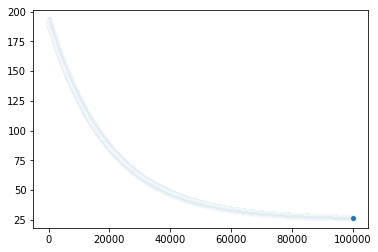

In [7]:
numIterations= 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)